# Laboratorio 2 - Series de tiempo
- Diego Jose Franco 20240
- Juan Diego Avila 20090

## 1.1 - Precios Promedio Nacionales Diarios

### Carga de datos

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Cargamos los datos
precios_promedio_2021 = pd.read_csv('./Data/Precios-Promedio-Nacionales-Diarios-2021.csv')
precios_promedio_2022 = pd.read_csv('./Data/Precios-Promedio-Nacionales-Diarios-2022.csv')
precios_promedio_2023 = pd.read_csv('./Data/Precios-Promedio-Nacionales-Diarios-2023.csv')

# Se renombra la ultima columna a Glp Cilindro Lbs.
precios_promedio_2021.rename(columns={'Unnamed: 7': 'Glp Cilindro Lbs.'}, inplace=True)
precios_promedio_2022.rename(columns={'Unnamed: 7': 'Glp Cilindro Lbs.'}, inplace=True)
precios_promedio_2023.rename(columns={'Unnamed: 7': 'Glp Cilindro Lbs.'}, inplace=True)

# Se unen los tres dataframes en uno solo
precios_promedio = pd.concat([precios_promedio_2021, precios_promedio_2022, precios_promedio_2023])

# Se eliminan las columnas que no se van a utilizar
precios_promedio = precios_promedio.drop(columns=['Bunker'])

### Analisis exploratorio

In [88]:
precios_promedio.head()

FECHA  Tipo de Cambio  Superior  Regular  Diesel  Glp Cilindro 25Lbs.  \
0  1-ene-21         7.79382     21.91    21.11   17.61                 99.0   
1  2-ene-21         7.79382     21.91    21.11   17.61                 99.0   
2  3-ene-21         7.79382     21.91    21.11   17.61                 99.0   
3  4-ene-21         7.79417     21.91    21.11   17.61                 99.0   
4  5-ene-21         7.79369     21.91    21.11   17.61                 99.0   

   Glp Cilindro Lbs.  
0               3.96  
1               3.96  
2               3.96  
3               3.96  
4               3.96

In [89]:
precios_promedio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 948 entries, 0 to 217
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FECHA                948 non-null    object 
 1   Tipo de Cambio       944 non-null    float64
 2   Superior             948 non-null    float64
 3   Regular              948 non-null    float64
 4   Diesel               948 non-null    float64
 5   Glp Cilindro 25Lbs.  948 non-null    float64
 6   Glp Cilindro Lbs.    948 non-null    float64
dtypes: float64(6), object(1)
memory usage: 59.2+ KB


In [90]:
precios_promedio.describe()

Tipo de Cambio    Superior     Regular      Diesel  \
count      944.000000  948.000000  948.000000  948.000000   
mean         7.761312   32.364916   31.208502   28.503059   
std          0.059130    4.552204    4.221649    6.040627   
min          7.650900   21.910000   21.110000   17.610000   
25%          7.719990   28.790000   27.990000   23.090000   
50%          7.738020   33.300000   31.840000   27.980000   
75%          7.807210   35.572500   34.260000   33.750000   
max          7.930240   43.240000   40.500000   41.270000   

       Glp Cilindro 25Lbs.  Glp Cilindro Lbs.  
count           948.000000         948.000000  
mean            123.723745           4.949061  
std               8.442288           0.337845  
min              99.000000           3.960000  
25%             120.000000           4.800000  
50%             122.000000           4.880000  
75%             122.000000           4.880000  
max             147.000000           5.880000

In [91]:
print(precios_promedio.isnull().sum())

FECHA                  0
Tipo de Cambio         4
Superior               0
Regular                0
Diesel                 0
Glp Cilindro 25Lbs.    0
Glp Cilindro Lbs.      0
dtype: int64


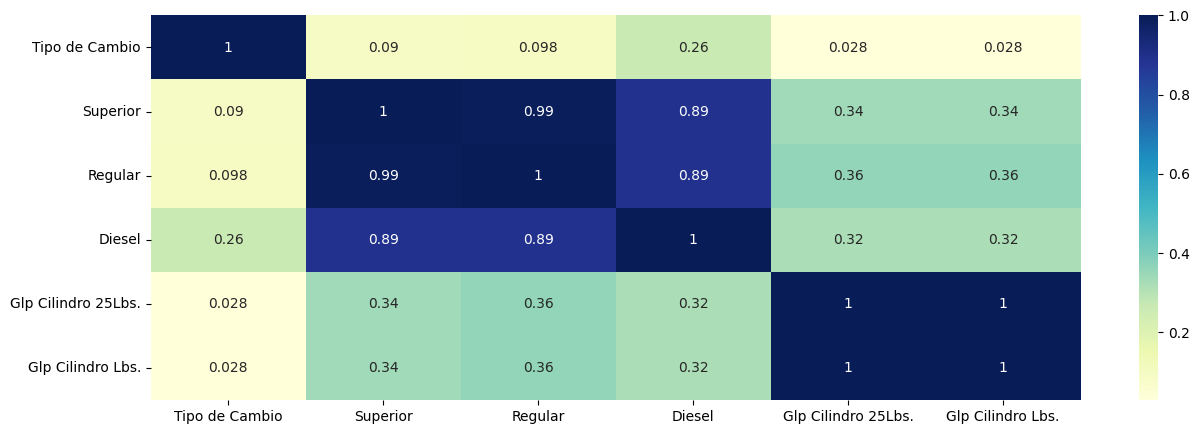

In [92]:
cuantitativas = [
    "Tipo de Cambio",
    "Superior",
    "Regular",
    "Diesel",
    "Glp Cilindro 25Lbs.",
    "Glp Cilindro Lbs."
]

precios_promedio_cuantitativas = precios_promedio[cuantitativas]
cr = precios_promedio_cuantitativas.corr()
sns.heatmap(cr, annot=True, cmap="YlGnBu")
plt.show()

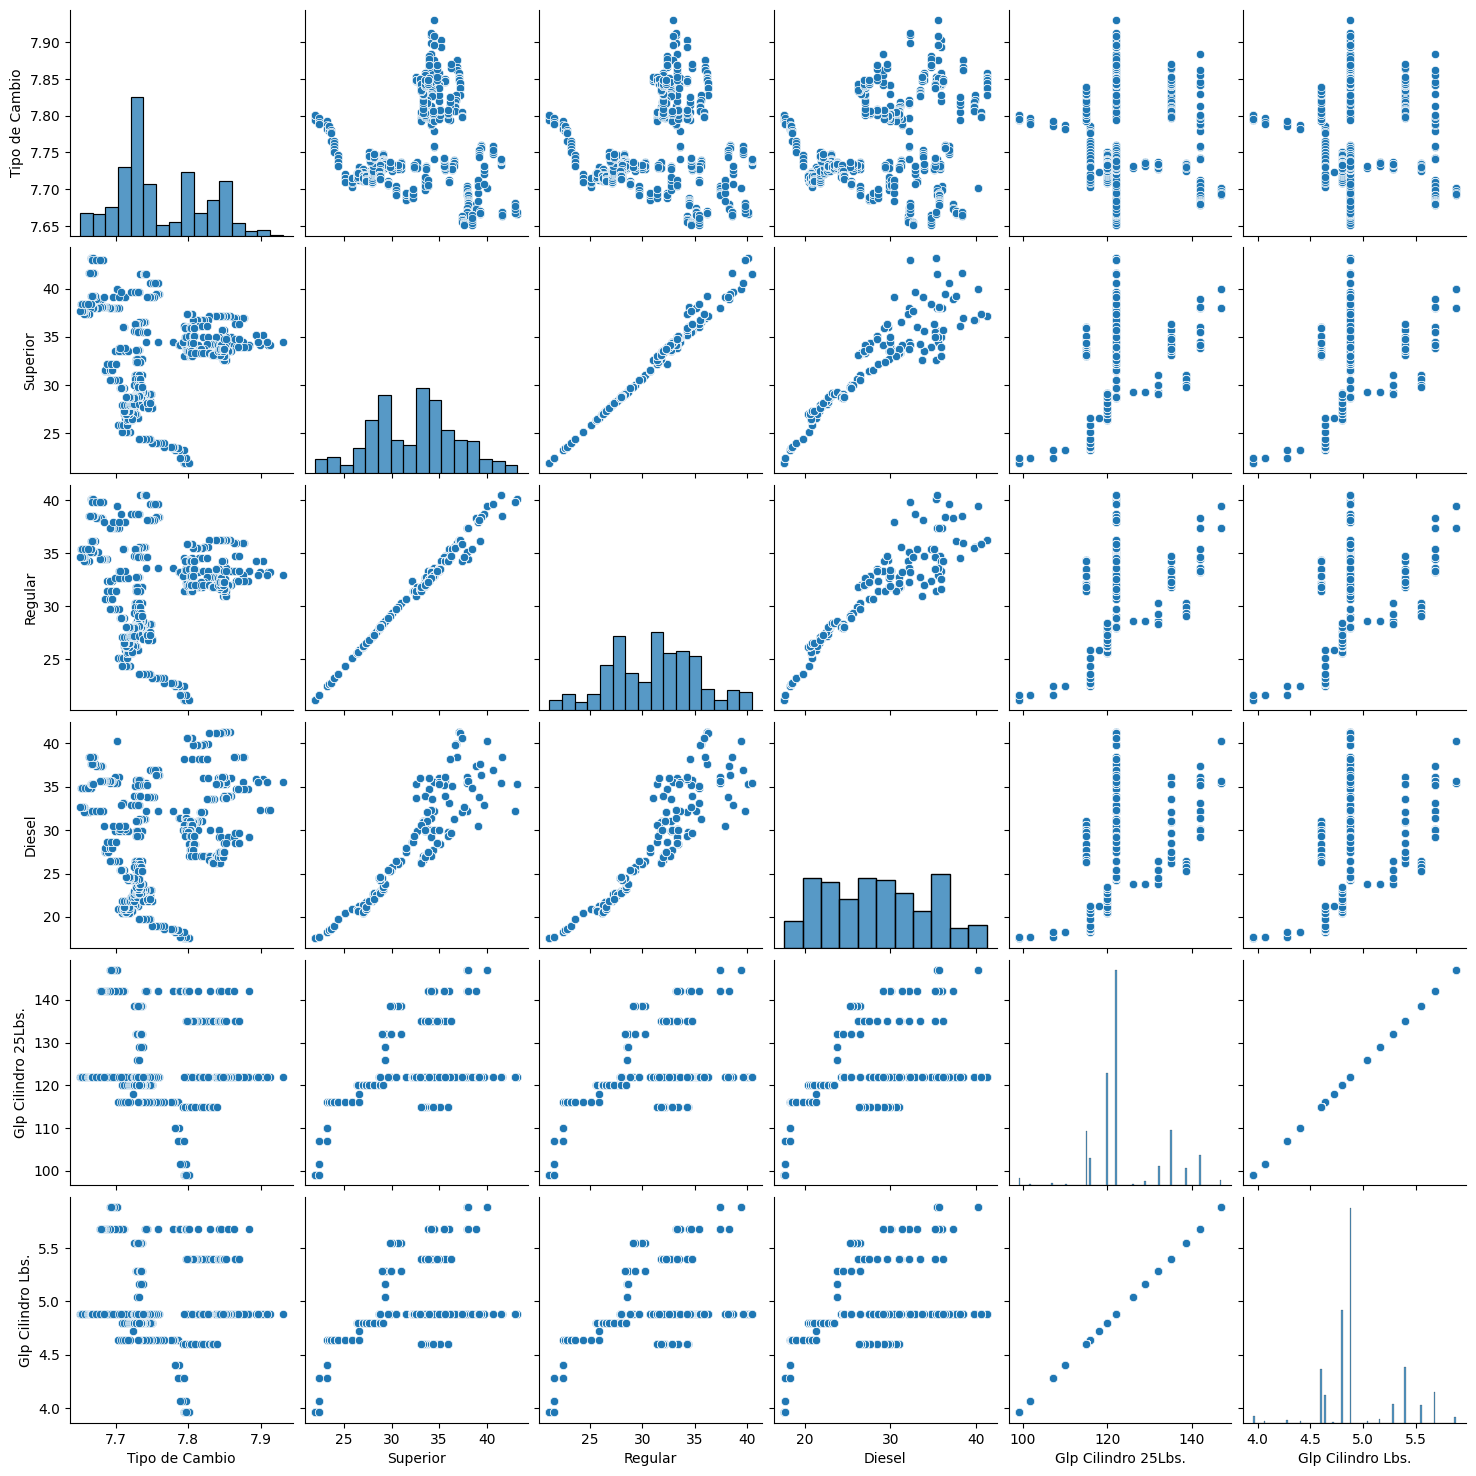

In [93]:
precios_promedio_cuantitativas.reset_index(drop=True, inplace=True)

grid = sns.pairplot(precios_promedio_cuantitativas)
plt.show()

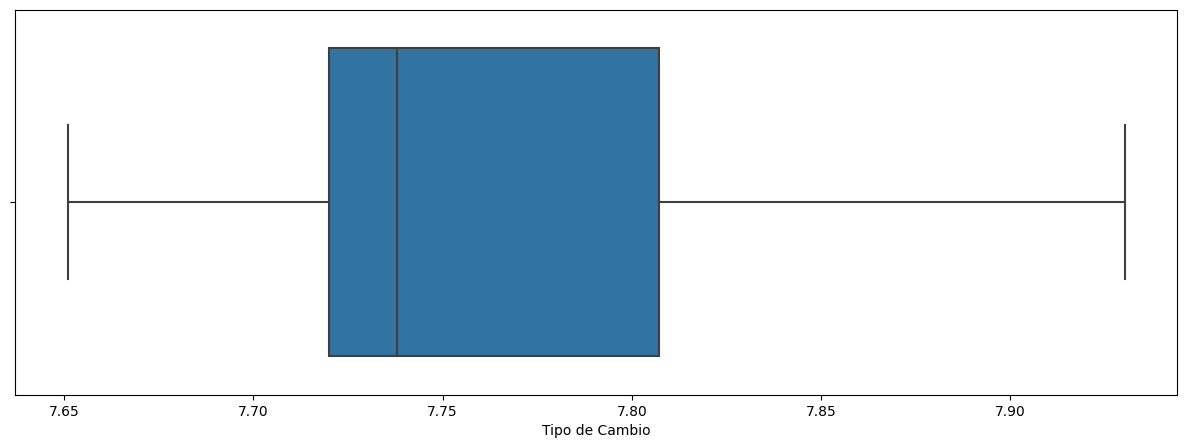

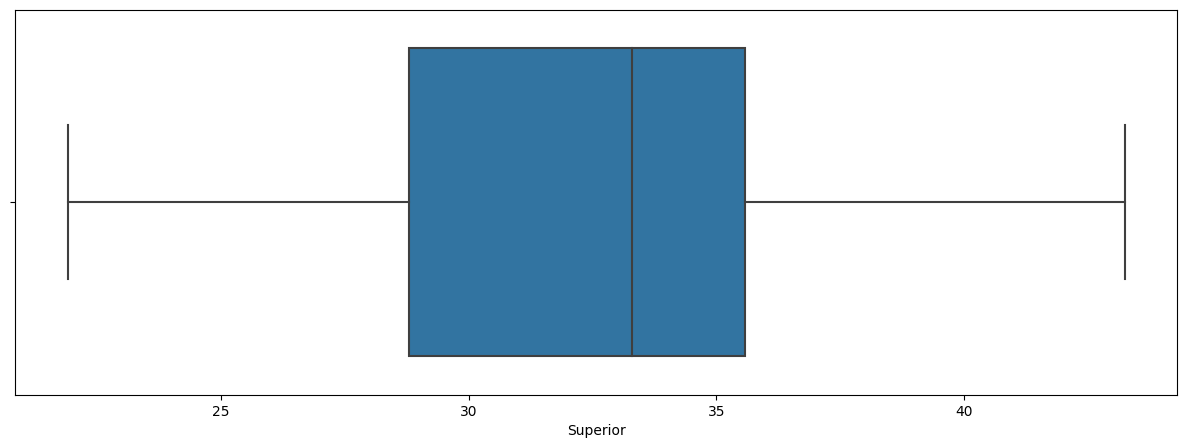

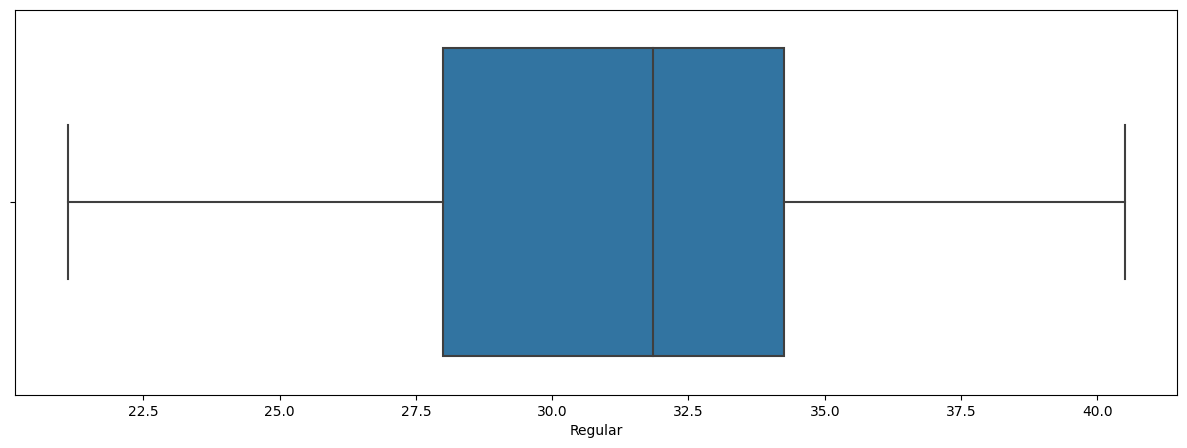

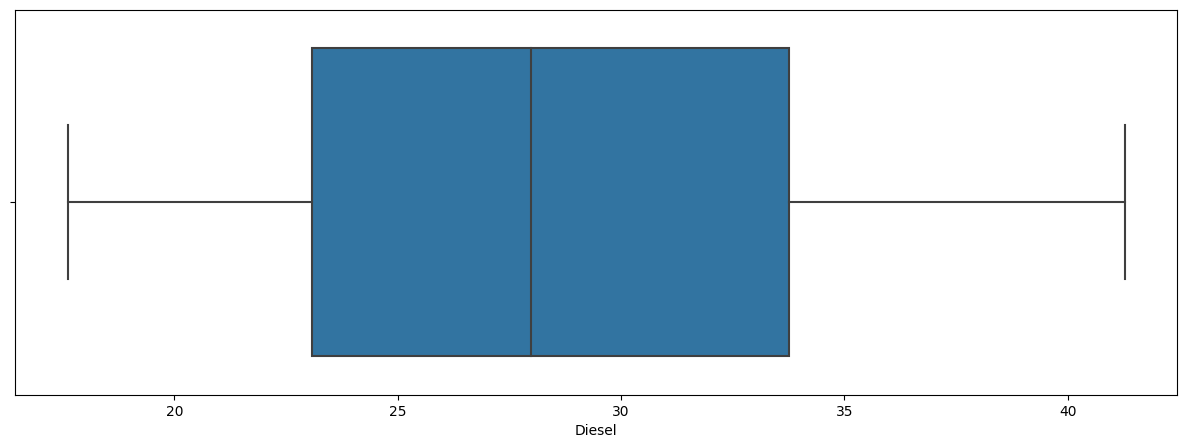

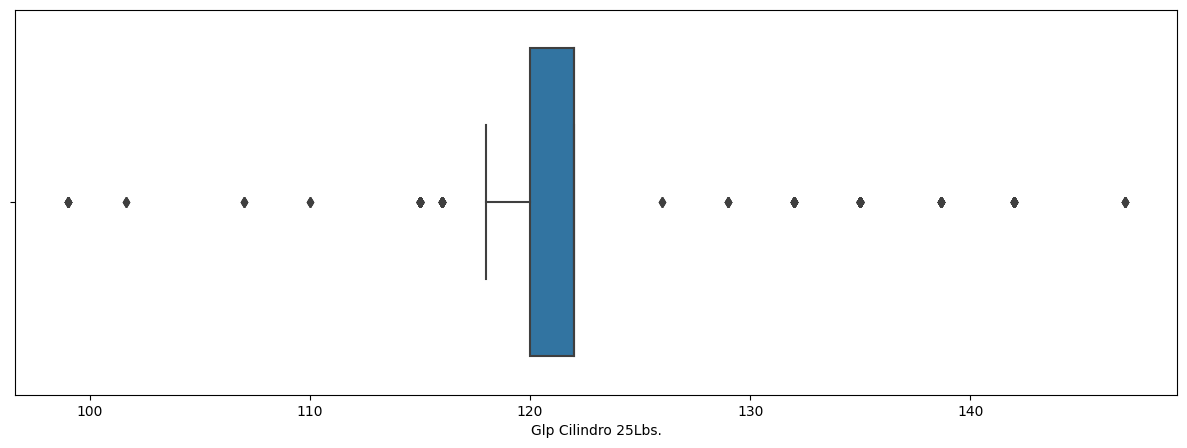

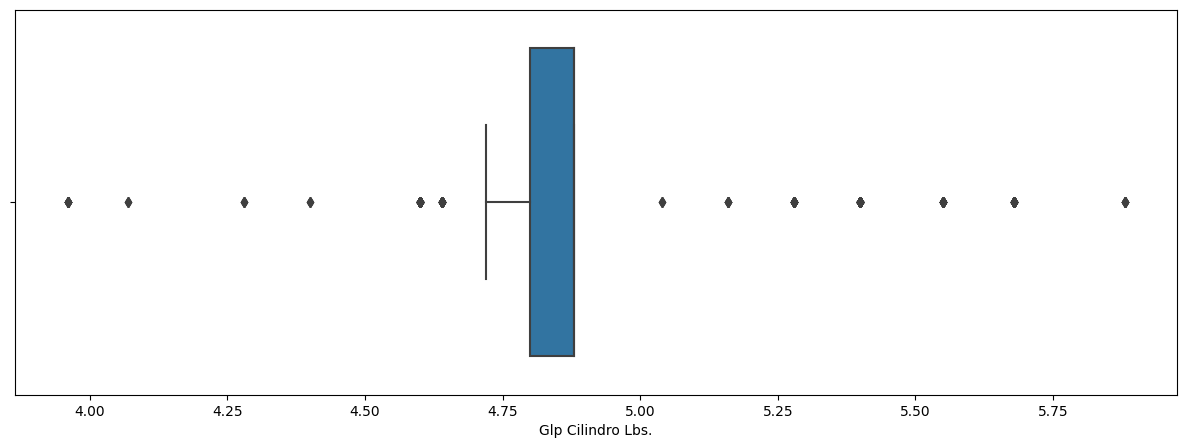

In [94]:
for col in cuantitativas:
    sns.boxplot(x = precios_promedio[col])
    plt.show()

0      1-01-21
1      2-01-21
2      3-01-21
3      4-01-21
4      5-01-21
        ...   
213    2-08-23
214    3-08-23
215    4-08-23
216    5-08-23
217    6-08-23
Name: FECHA, Length: 948, dtype: object


C:\Users\Juan_Avila\AppData\Local\Temp\ipykernel_21904\1656127391.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grupo = precios_promedio.groupby(['AÑO']).mean()


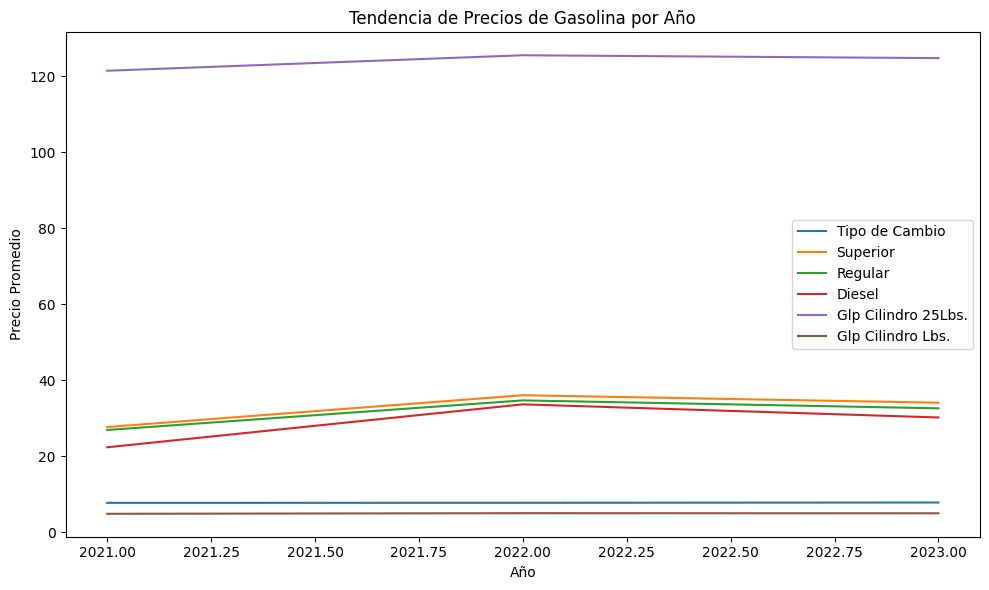

In [95]:
meses_dict = {
    'ene': '01', 'feb': '02', 'mar': '03', 'abr': '04', 'may': '05', 'jun': '06',
    'jul': '07', 'ago': '08', 'sep': '09', 'oct': '10', 'nov': '11', 'dic': '12'
}

def reemplazar_mes(fecha):
    partes = fecha.split('-')
    partes[1] = meses_dict[partes[1]]
    return '-'.join(partes)

precios_promedio['FECHA'] = precios_promedio['FECHA'].apply(reemplazar_mes)
print(precios_promedio['FECHA'])
    

precios_promedio['FECHA'] = pd.to_datetime(precios_promedio['FECHA'], format='%d-%m-%y')
precios_promedio['AÑO'] = precios_promedio['FECHA'].dt.year
precios_promedio['MES'] = precios_promedio['FECHA'].dt.month

grupo = precios_promedio.groupby(['AÑO']).mean()

tendencia = grupo[cuantitativas]
tendencia = tendencia.reset_index()

plt.figure(figsize=(10, 6))

for columna in cuantitativas:
    plt.plot(tendencia["AÑO"], tendencia[columna], label=columna)

plt.xlabel('Año')
plt.ylabel('Precio Promedio')
plt.title('Tendencia de Precios de Gasolina por Año')
plt.legend()

plt.tight_layout()
plt.show()

Se puede observar que el precio de gasolina por año ha sido bastante constante en los años, con un incremento de casi el doble en el 2022, que se ha reducido muy poco hasta la actualidad en el 2023. 

C:\Users\Juan_Avila\AppData\Local\Temp\ipykernel_21904\1760609747.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grupo = precios_promedio.groupby(['MES']).mean()


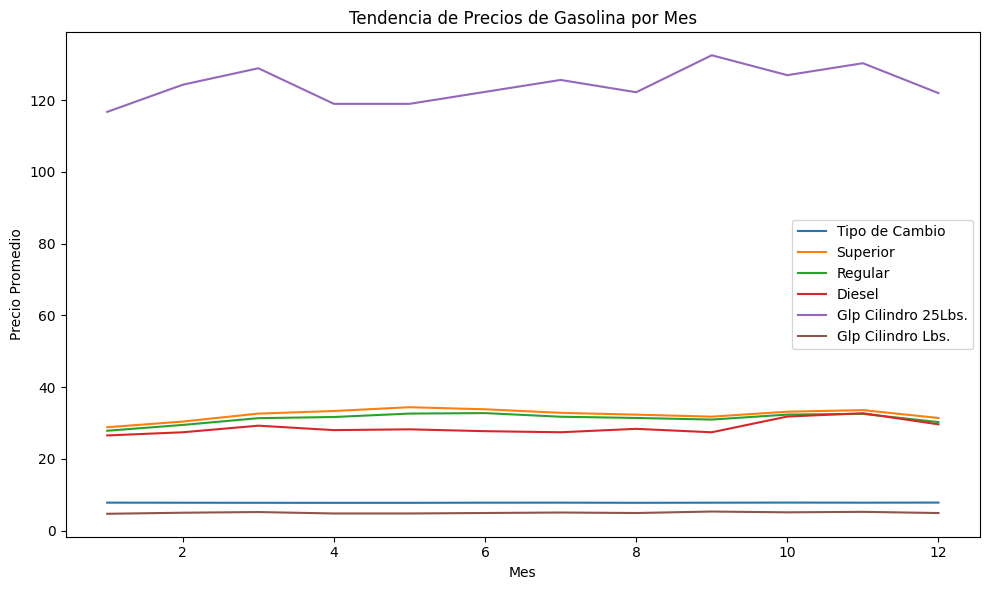

In [96]:
grupo = precios_promedio.groupby(['MES']).mean()

tendencia = grupo[cuantitativas]
tendencia = tendencia.reset_index()

plt.figure(figsize=(10, 6))

for columna in cuantitativas:
    plt.plot(tendencia["MES"], tendencia[columna], label=columna)

plt.xlabel('Mes')
plt.ylabel('Precio Promedio')
plt.title('Tendencia de Precios de Gasolina por Mes')
plt.legend()

plt.tight_layout()
plt.show()

Se puede observar que realmente no existe mucha variacion entre los valores de los combustibles durante los meses. Pero se puede destacar que los meses en donde el precio es mayor son a final de año, en los meses de noviembre y diciembre. Además de ello se puede notar que el gas liacuado siempre se mantiene con precios bajos.

In [97]:
from scipy.stats import normaltest

norm = precios_promedio_cuantitativas.apply(normaltest)
print("Resultados de test de normalidad: \n", norm)

Resultados de test de normalidad: 
    Tipo de Cambio   Superior   Regular        Diesel  Glp Cilindro 25Lbs.  \
0             NaN  13.693900  8.744152  1.781288e+02         6.549501e+01   
1             NaN   0.001063  0.012625  2.088471e-39         5.997065e-15   

   Glp Cilindro Lbs.  
0       6.565420e+01  
1       5.538240e-15  


## 1.2 - Consumo de Combustible

### Carga de datos

In [98]:
import numpy as np
import pandas as pd

# Cargamos los datos
consumo = pd.read_csv('./Data/CONSUMO.csv')

### Analisis exploratorio

In [99]:
consumo.head()

Fecha Gas licuado de petróleo Gasolina regular Gasolina superior  \
0  ene-00              194,410.48       202,645.20        308,156.82   
1  feb-00              174,710.55       205,530.96        307,766.31   
2  mar-00              189,234.07       229,499.56        331,910.29   
3  abr-00              174,330.61       210,680.40        315,648.08   
4  may-00              191,745.15       208,164.34        319,667.97   

  Diesel alto azufre         Total  
0         634,667.06  1,750,544.64  
1         642,380.66  1,773,220.22  
2         699,807.25  1,909,498.79  
3         586,803.98  1,800,932.86  
4         656,948.20  1,941,771.90

In [100]:
consumo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Fecha                    281 non-null    object
 1   Gas licuado de petróleo  281 non-null    object
 2   Gasolina regular         281 non-null    object
 3   Gasolina superior        281 non-null    object
 4   Diesel alto azufre       281 non-null    object
 5   Total                    281 non-null    object
dtypes: object(6)
memory usage: 13.3+ KB


In [101]:
consumo.describe()

Fecha Gas licuado de petróleo Gasolina regular Gasolina superior  \
count      281                     281              281               281   
unique     281                     281              281               281   
top     ene-00              194,410.48       202,645.20        308,156.82   
freq         1                       1                1                 1   

       Diesel alto azufre         Total  
count                 281           281  
unique                281           281  
top            634,667.06  1,750,544.64  
freq                    1             1

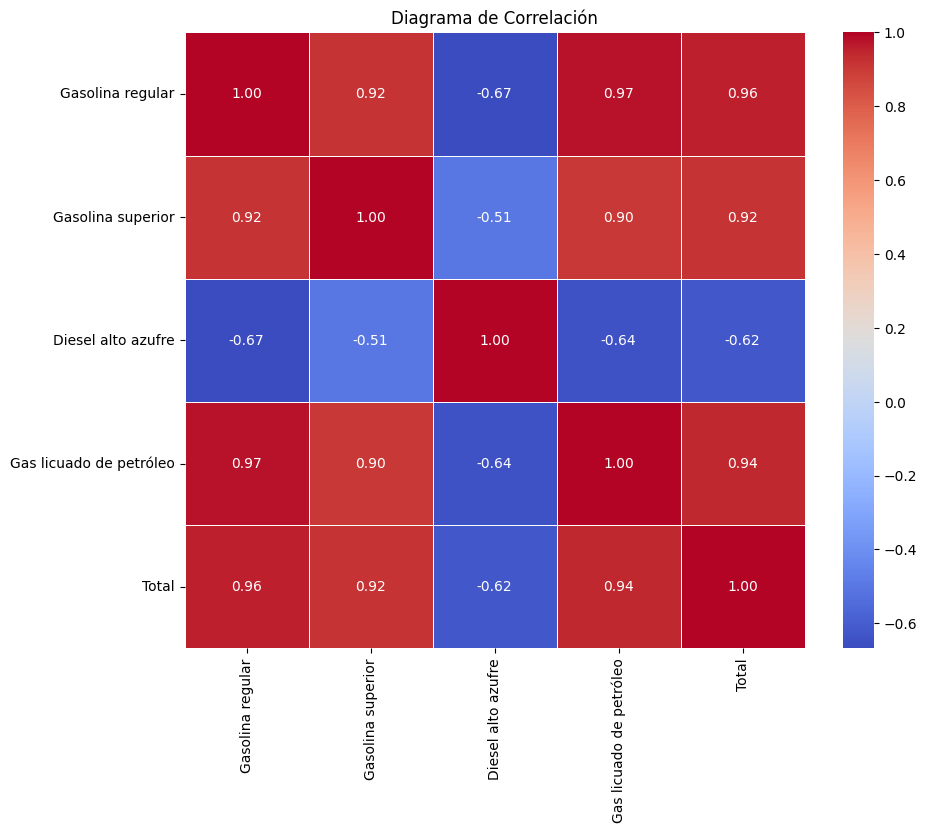

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cuantitativas = ["Gasolina regular", "Gasolina superior", "Diesel alto azufre", "Gas licuado de petróleo", "Total"]

# casteamos las variables a float
for col in cuantitativas:
    consumo[col] = consumo[col].str.replace(',', '').astype(float)

consumo_numericas = consumo[cuantitativas]
correlation_matrix = consumo_numericas.corr()

# Crear el diagrama de correlación utilizando Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Diagrama de Correlación')
plt.show()

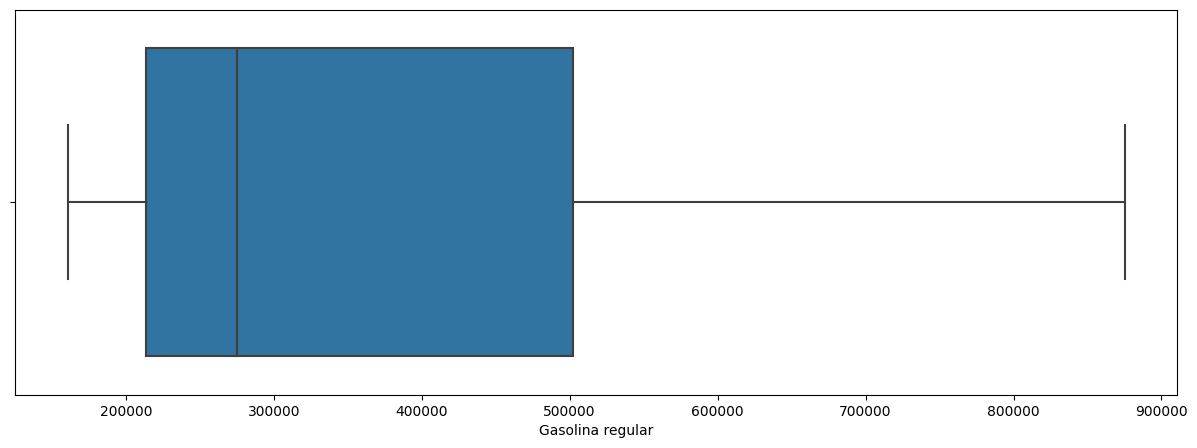

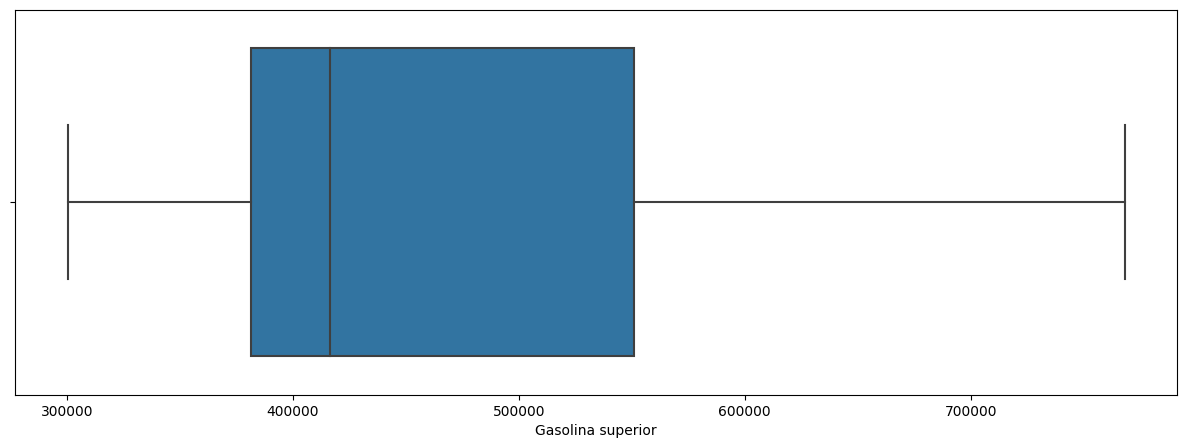

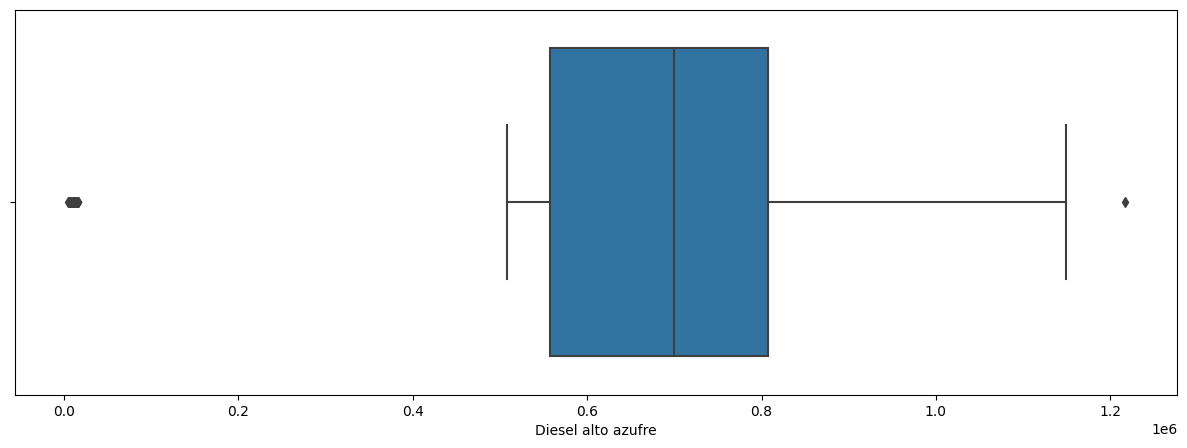

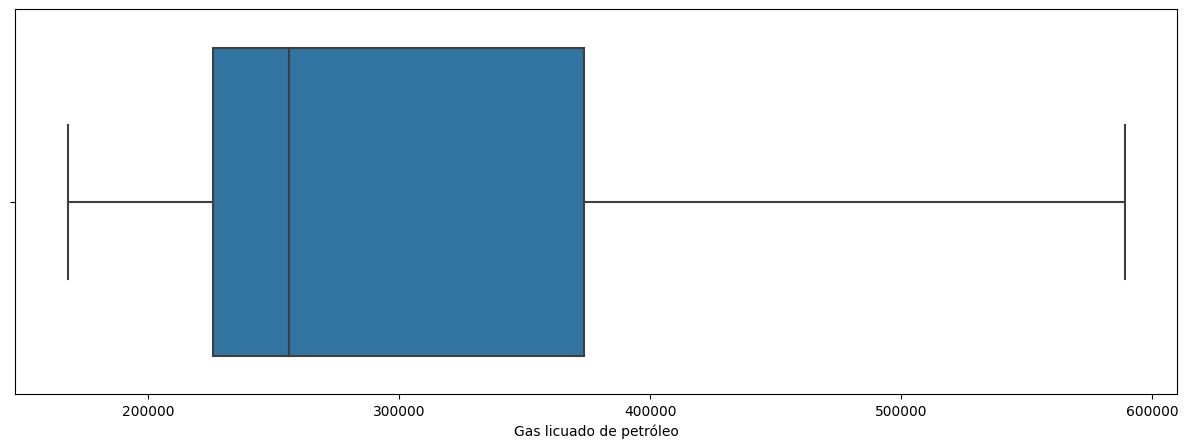

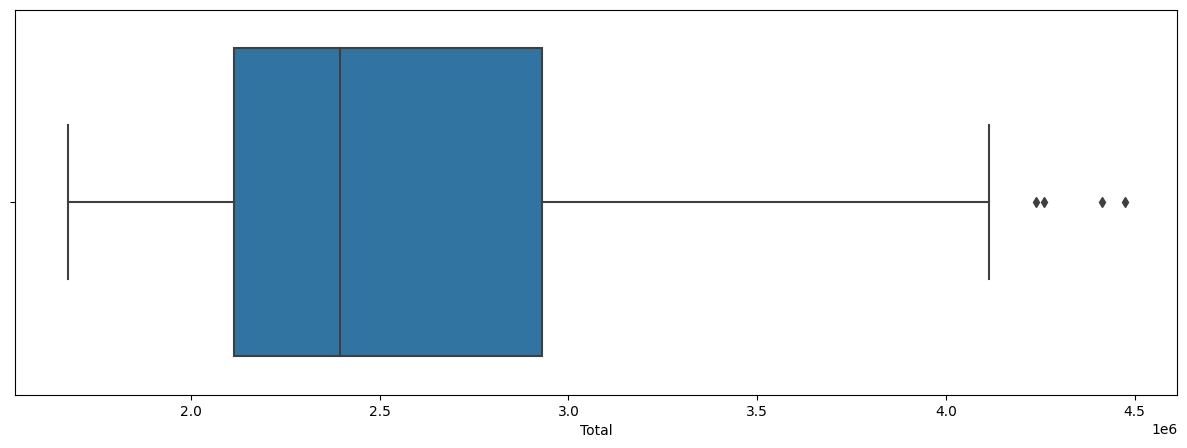

In [103]:
for col in cuantitativas:
    sns.boxplot(x = consumo_numericas[col])
    plt.show()

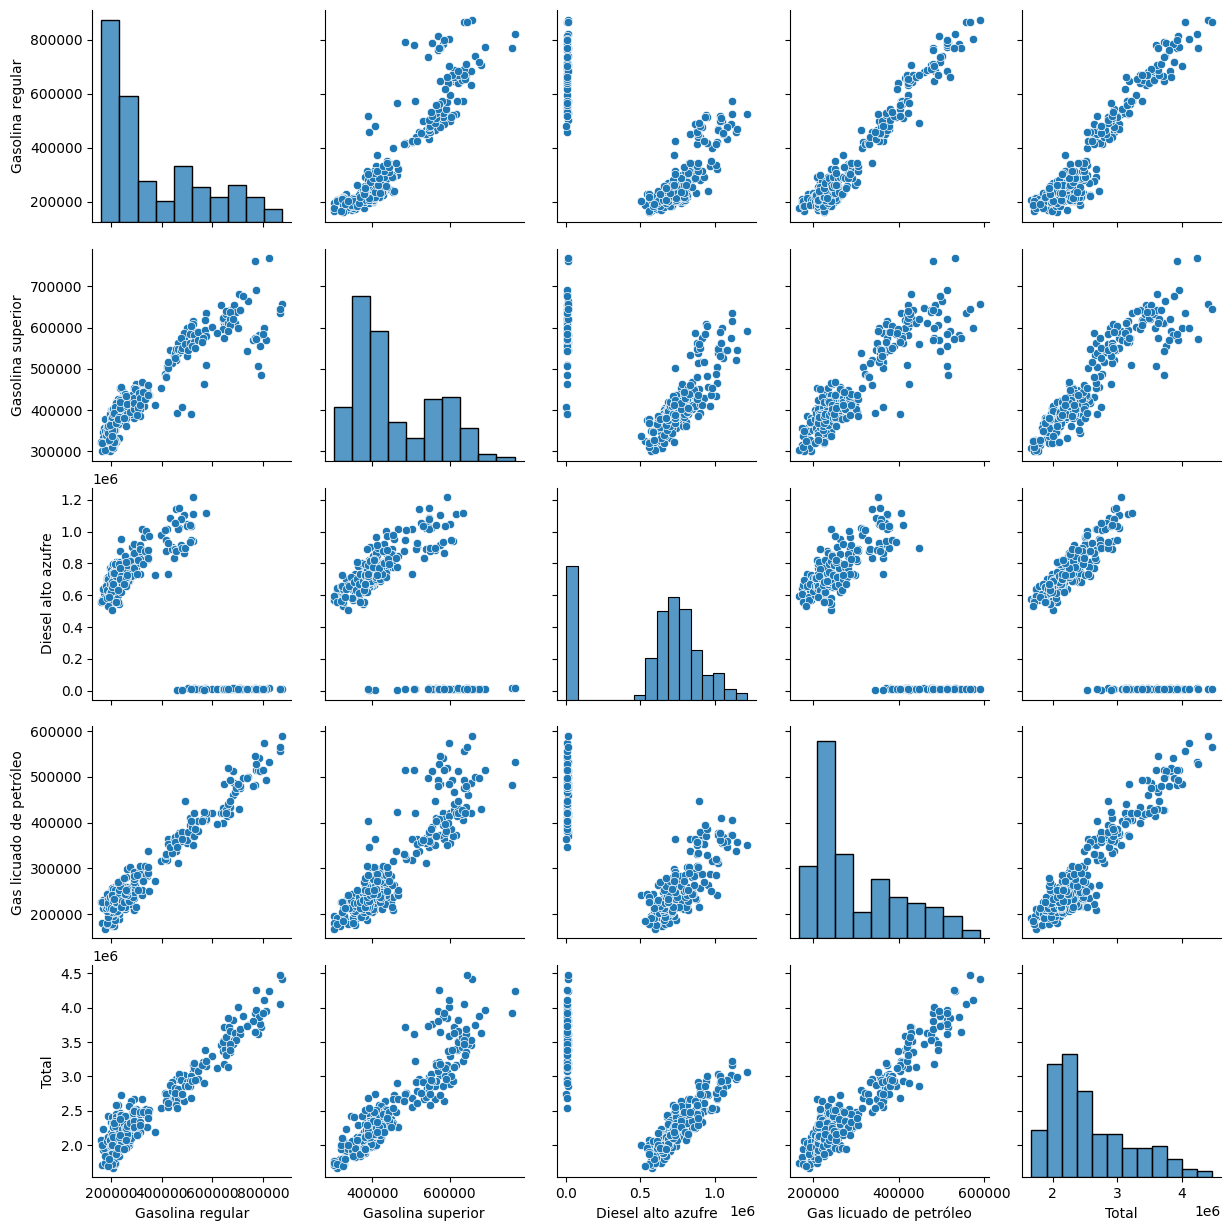

In [104]:
grid = sns.pairplot(consumo_numericas)
plt.show()

In [105]:

años_dict = {
    '00': '2000', '01': '2001', '02': '2002', '03': '2003', '04': '2004', '05': '2005',
    '06': '2006', '07': '2007', '08': '2008', '09': '2009', '10': '2010', '11': '2011',
    '12': '2012', '13': '2013', '14': '2014', '15': '2015', '16': '2016', '17': '2017',
    '18': '2018', '19': '2019', '20': '2020', '21': '2021', '22': '2022', '23': '2023',
}

meses_dict = {
    'ene': '01', 'feb': '02', 'mar': '03', 'abr': '04', 'may': '05', 'jun': '06',
    'jul': '07', 'ago': '08', 'sep': '09', 'oct': '10', 'nov': '11', 'dic': '12'
}

def reemplazar_mes(fecha):
    partes = fecha.split('-')
    partes[0] = meses_dict[partes[0]]
    partes[1] = años_dict[partes[1]]
    return '-'.join(partes)

consumo['Fecha'] = consumo['Fecha'].apply(reemplazar_mes)

consumo['Fecha'] = pd.to_datetime(consumo['Fecha'], format='%m-%Y')

C:\Users\Juan_Avila\AppData\Local\Temp\ipykernel_21904\3096194327.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grupo = consumo.groupby(['AÑO']).mean()


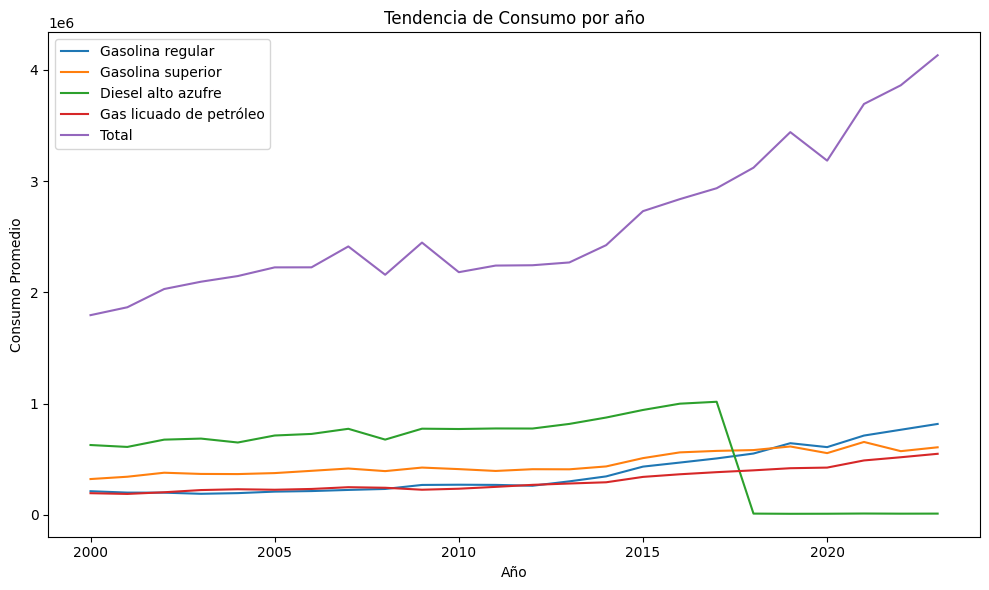

In [106]:

consumo['AÑO'] = consumo['Fecha'].dt.year
consumo['MES'] = consumo['Fecha'].dt.month

grupo = consumo.groupby(['AÑO']).mean()

tendencia = grupo[cuantitativas]
tendencia = tendencia.reset_index()

plt.figure(figsize=(10, 6))

for columna in cuantitativas:
    plt.plot(tendencia["AÑO"], tendencia[columna], label=columna)

plt.xlabel('Año')
plt.ylabel('Consumo Promedio')
plt.title('Tendencia de Consumo por año')
plt.legend()

plt.tight_layout()
plt.show()

Como se puede observar, el consumo total de gasolina ha aumentado considerablemente desde el 2000, casi más del doble. Es importante remarcar que el consumo del diesel ha disminuido bastante en comparación a los otros tipos de gasolina, esto se debe a que el diesel es un combustible más contaminante que los otros tipos de gasolina, por lo que se ha ido sustituyendo por otros tipos de gasolina más limpios.

C:\Users\Juan_Avila\AppData\Local\Temp\ipykernel_21904\2915460692.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grupo = consumo.groupby(['MES']).mean()


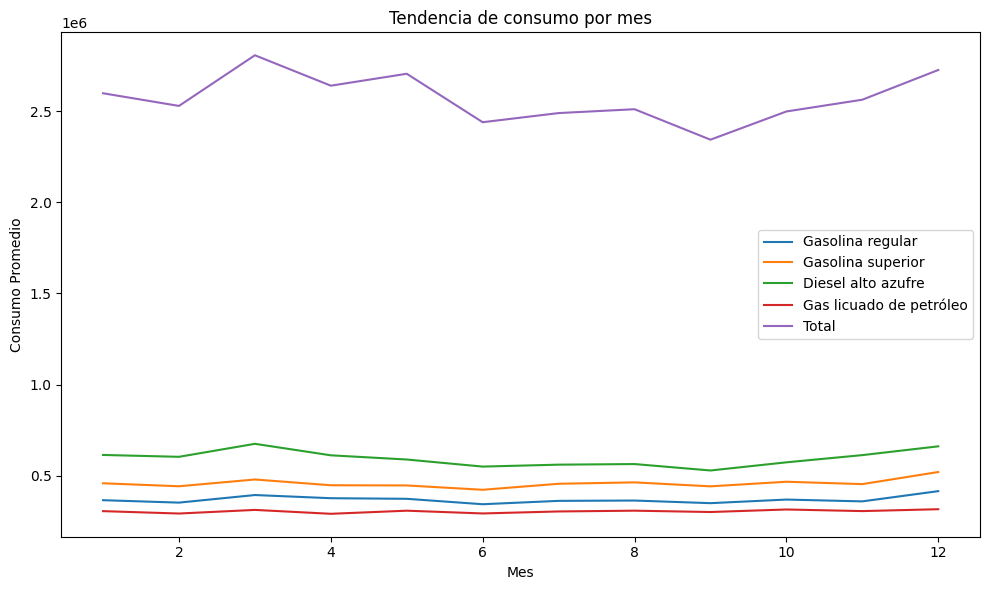

In [107]:
grupo = consumo.groupby(['MES']).mean()

tendencia = grupo[cuantitativas]
tendencia = tendencia.reset_index()

plt.figure(figsize=(10, 6))

for columna in cuantitativas:
    plt.plot(tendencia["MES"], tendencia[columna], label=columna)

plt.xlabel('Mes')
plt.ylabel('Consumo Promedio')
plt.title('Tendencia de consumo por mes')
plt.legend()

plt.tight_layout()
plt.show()

Como se puede observar en el grafico, realmente el consumo de los combustibles a traves de los meses es practicamente constante, sin embargo en la linea del consumo total se puede evidenciar que en los primeros meses del año el consumo tiene unos picos en donde el precio sube ligeramente. Y el resto de los años se va manteniendo constante casi llegando al punto de incico del año siguiente.

In [108]:
from scipy.stats import normaltest
normality_test = consumo_numericas.apply(normaltest)
print("Resultados de test de normalidad: \n", normality_test)

Resultados de test de normalidad: 
    Gasolina regular  Gasolina superior  Diesel alto azufre  \
0      3.507221e+01       2.957783e+01        3.564834e+01   
1      2.421952e-08       3.777945e-07        1.815774e-08   

   Gas licuado de petróleo         Total  
0             3.069400e+01  3.233865e+01  
1             2.162134e-07  9.500622e-08  


Ninguna de las distribuciones de las variables interesantes es normal.

## 1.3 - Importacion de Combustible

### Carga de datos

In [109]:
print("Info de importacion:")
# Cargamos los datos
importacion = pd.read_csv('./Data/IMPORTACION.csv')


Info de importacion:


### Análisis exploratorio

In [110]:
importacion.head()


Fecha Gas licuado de petróleo Gasolina regular Gasolina superior  \
0  ene-01              194,065.74       177,776.50        373,963.96   
1  feb-01              170,703.38       123,115.99        243,091.07   
2  mar-01              161,837.37       161,726.42        312,084.38   
3  abr-01              163,048.64       127,338.74        285,054.89   
4  may-01              171,518.86       168,730.19        300,913.67   

  Diesel alto azufre         Total  
0         566,101.99  2,312,639.05  
1         489,525.80  1,769,208.76  
2         575,559.68  1,945,770.26  
3         437,745.42  1,623,637.76  
4         552,609.13  2,262,726.64

In [111]:
importacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Fecha                    269 non-null    object
 1   Gas licuado de petróleo  269 non-null    object
 2   Gasolina regular         269 non-null    object
 3   Gasolina superior        269 non-null    object
 4   Diesel alto azufre       269 non-null    object
 5   Total                    269 non-null    object
dtypes: object(6)
memory usage: 12.7+ KB


In [112]:
importacion.describe()

Fecha Gas licuado de petróleo Gasolina regular Gasolina superior  \
count      269                     269              269               269   
unique     269                     269              269               269   
top     ene-01              194,065.74       177,776.50        373,963.96   
freq         1                       1                1                 1   

       Diesel alto azufre         Total  
count                 269           269  
unique                269           269  
top            566,101.99  2,312,639.05  
freq                    1             1

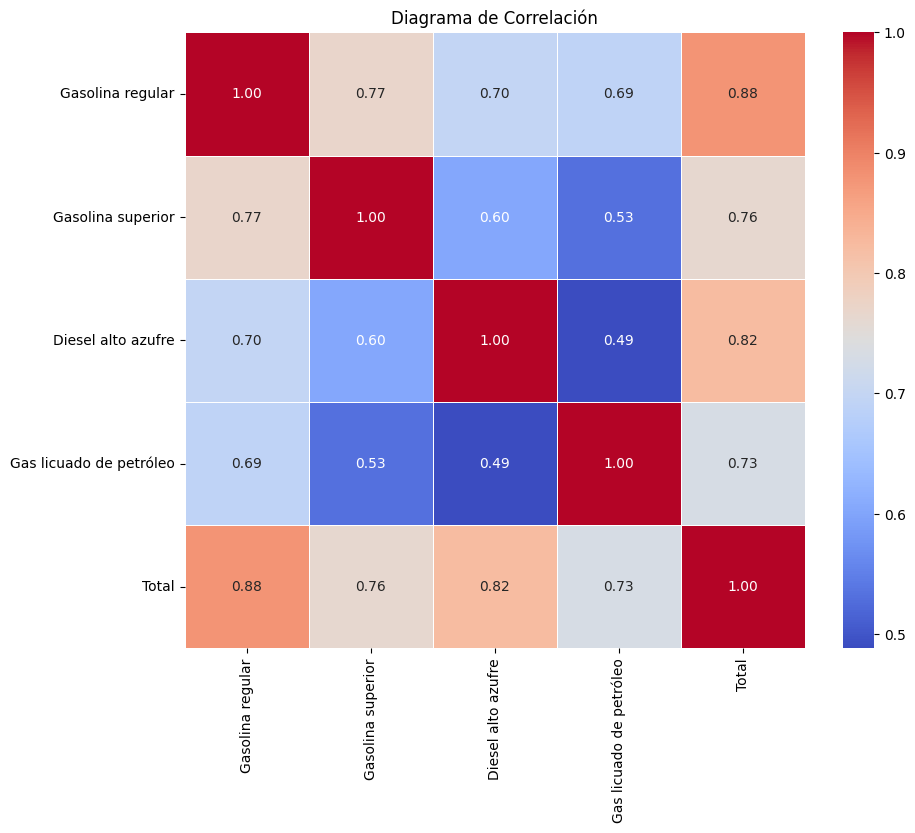

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cuantitativas = ["Gasolina regular", "Gasolina superior", "Diesel alto azufre", "Gas licuado de petróleo", "Total"]

# casteamos las variables a float
for col in cuantitativas:
    importacion[col] = importacion[col].str.replace(',', '').astype(float)

importacion_numericas = importacion[cuantitativas]
correlation_matrix = importacion_numericas.corr()

# Crear el diagrama de correlación utilizando Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Diagrama de Correlación')
plt.show()

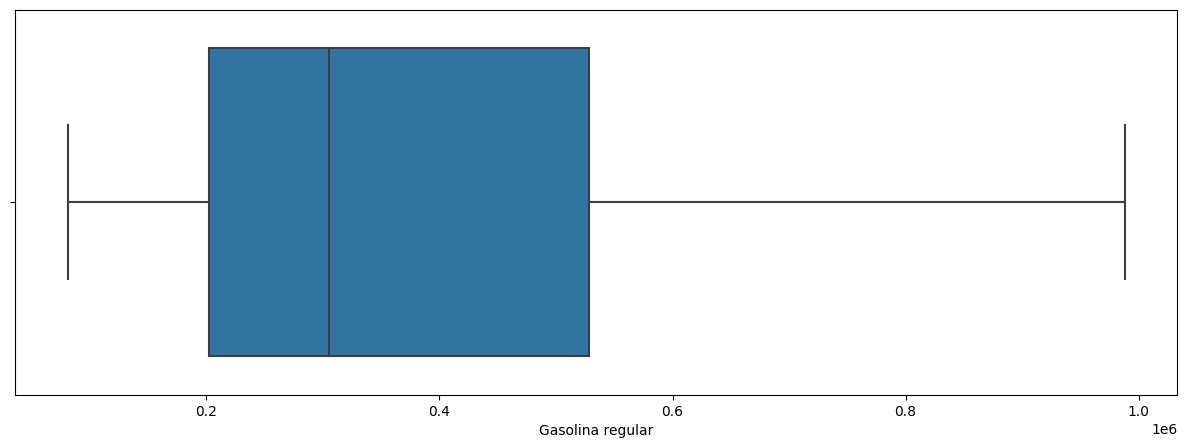

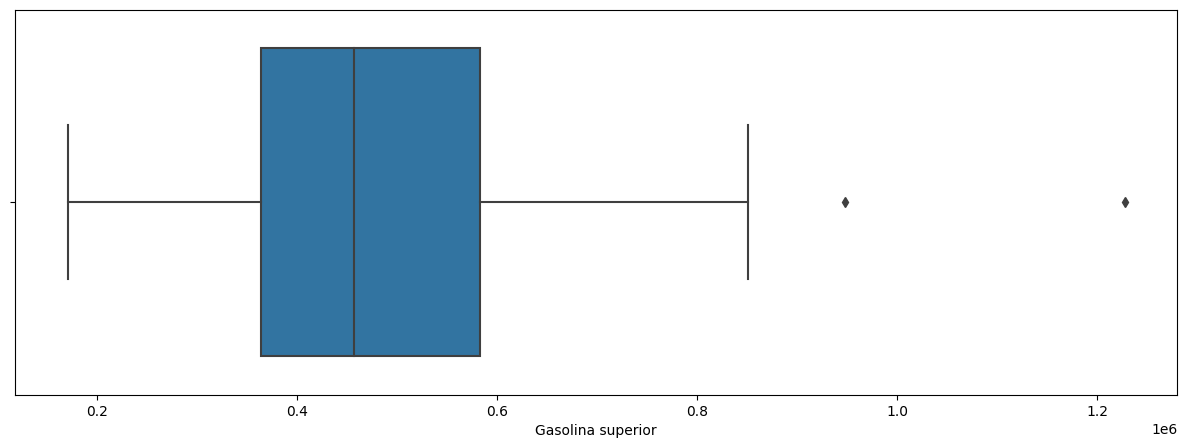

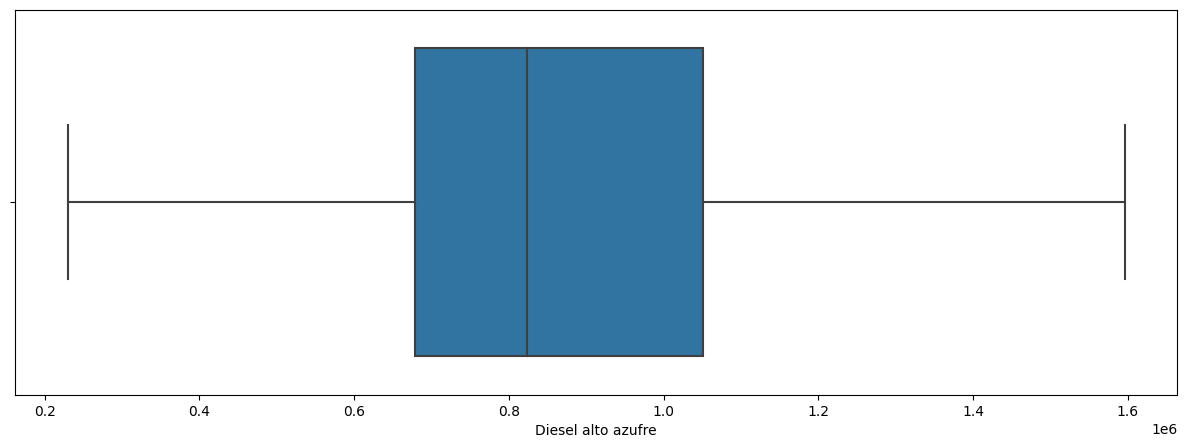

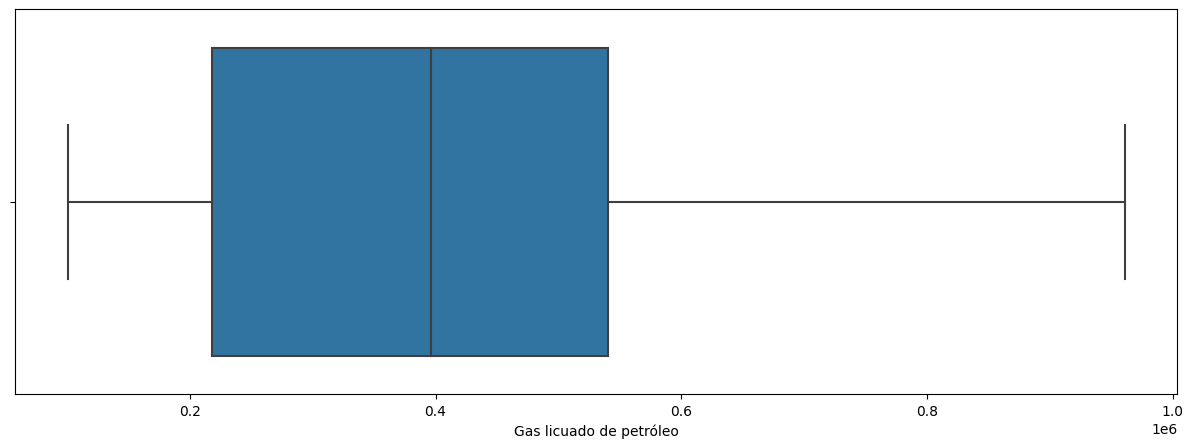

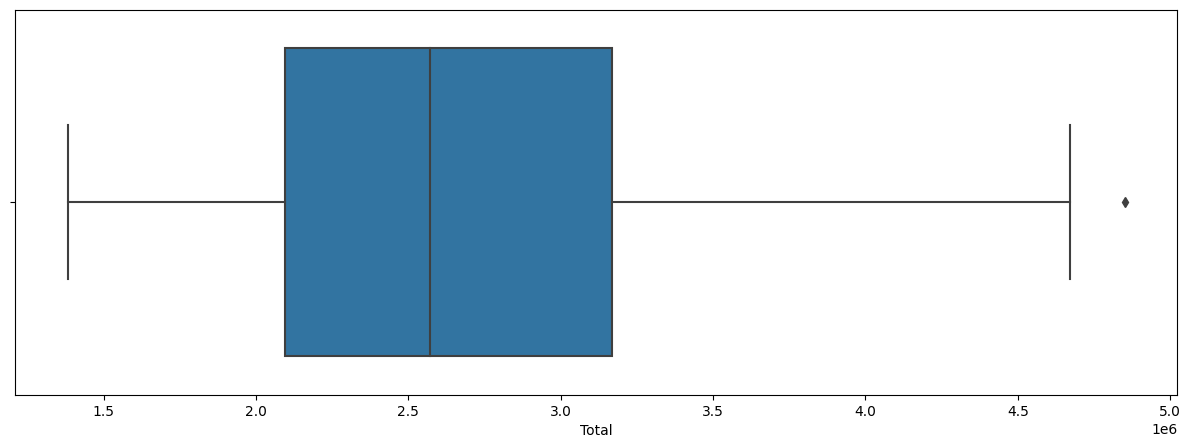

In [114]:
for col in cuantitativas:
    sns.boxplot(x = importacion_numericas[col])
    plt.show()

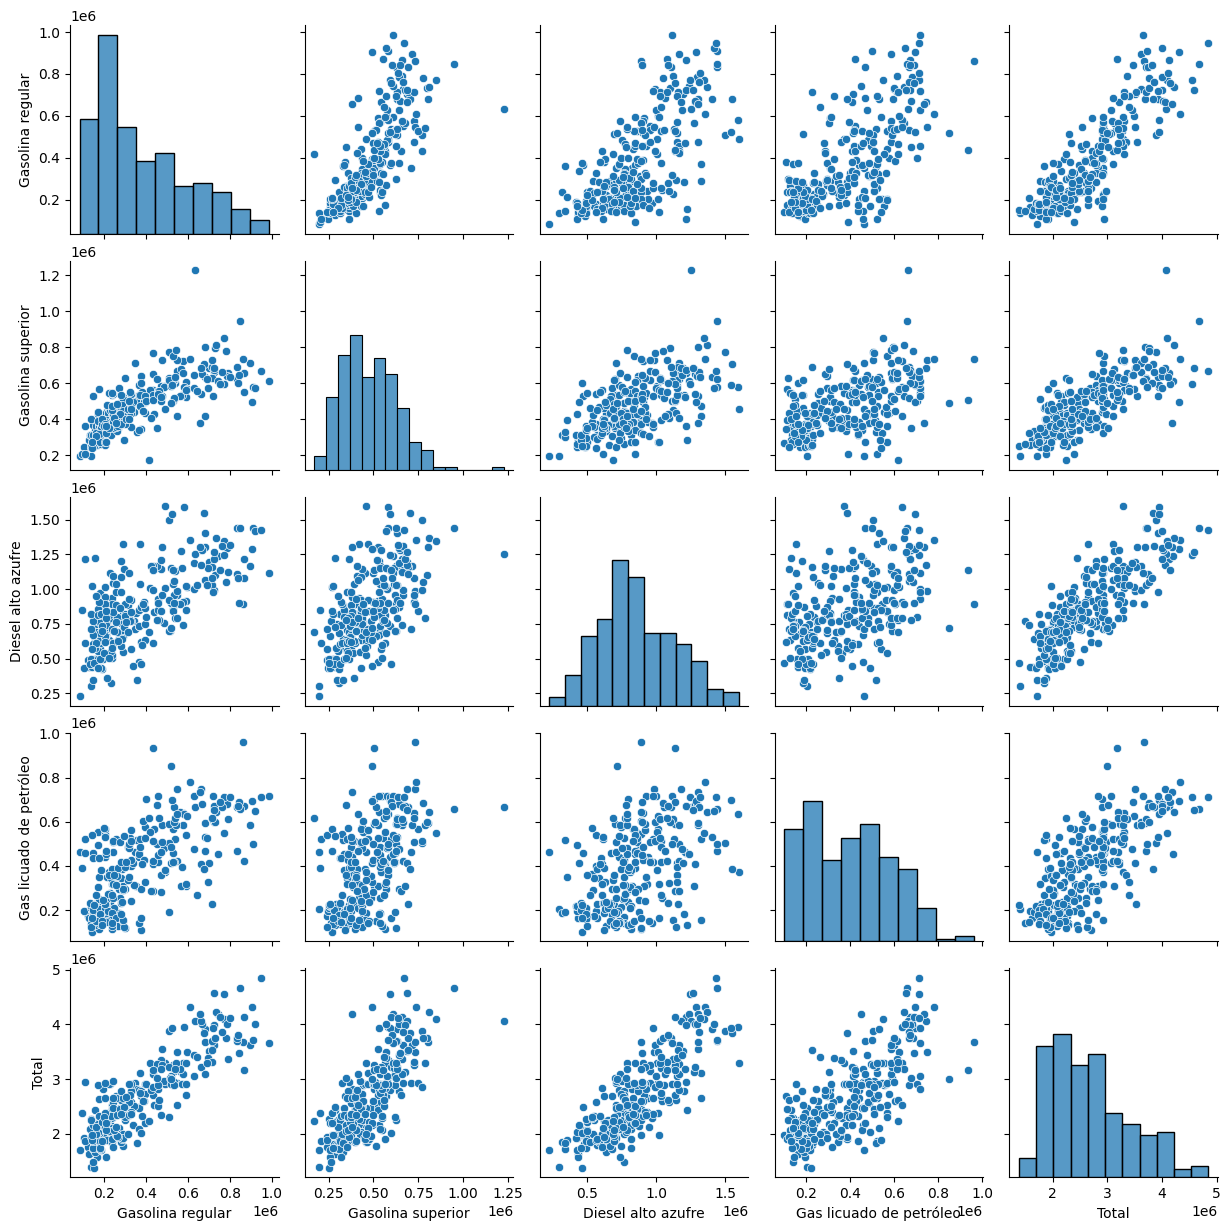

In [115]:
grid = sns.pairplot(importacion_numericas)
plt.show()

In [116]:

años_dict = {
    '00': '2000', '01': '2001', '02': '2002', '03': '2003', '04': '2004', '05': '2005',
    '06': '2006', '07': '2007', '08': '2008', '09': '2009', '10': '2010', '11': '2011',
    '12': '2012', '13': '2013', '14': '2014', '15': '2015', '16': '2016', '17': '2017',
    '18': '2018', '19': '2019', '20': '2020', '21': '2021', '22': '2022', '23': '2023',
}

meses_dict = {
    'ene': '01', 'feb': '02', 'mar': '03', 'abr': '04', 'may': '05', 'jun': '06',
    'jul': '07', 'ago': '08', 'sep': '09', 'oct': '10', 'nov': '11', 'dic': '12'
}

def reemplazar_mes(fecha):
    partes = fecha.split('-')
    partes[0] = meses_dict[partes[0]]
    partes[1] = años_dict[partes[1]]
    return '-'.join(partes)

importacion['Fecha'] = importacion['Fecha'].apply(reemplazar_mes)

importacion['Fecha'] = pd.to_datetime(importacion['Fecha'], format='%m-%Y')

C:\Users\Juan_Avila\AppData\Local\Temp\ipykernel_21904\2456724372.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grupo = importacion.groupby(['AÑO']).mean()


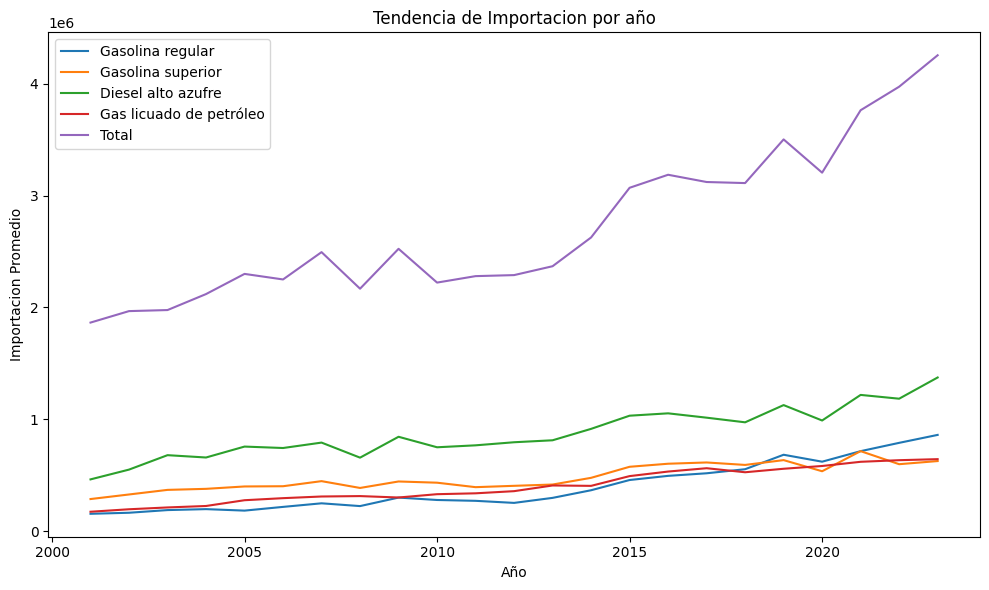

In [117]:

importacion['AÑO'] = importacion['Fecha'].dt.year
importacion['MES'] = importacion['Fecha'].dt.month

grupo = importacion.groupby(['AÑO']).mean()

tendencia = grupo[cuantitativas]
tendencia = tendencia.reset_index()

plt.figure(figsize=(10, 6))

for columna in cuantitativas:
    plt.plot(tendencia["AÑO"], tendencia[columna], label=columna)

plt.xlabel('Año')
plt.ylabel('Importacion Promedio')
plt.title('Tendencia de Importacion por año')
plt.legend()

plt.tight_layout()
plt.show()

Se puede observar que la importanción de combustible en todas sus presentaciones ha aumentado en los últimos años, esto se debe a que la demanda de combustible ha aumentado.

C:\Users\Juan_Avila\AppData\Local\Temp\ipykernel_21904\2494745352.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grupo = importacion.groupby(['MES']).mean()


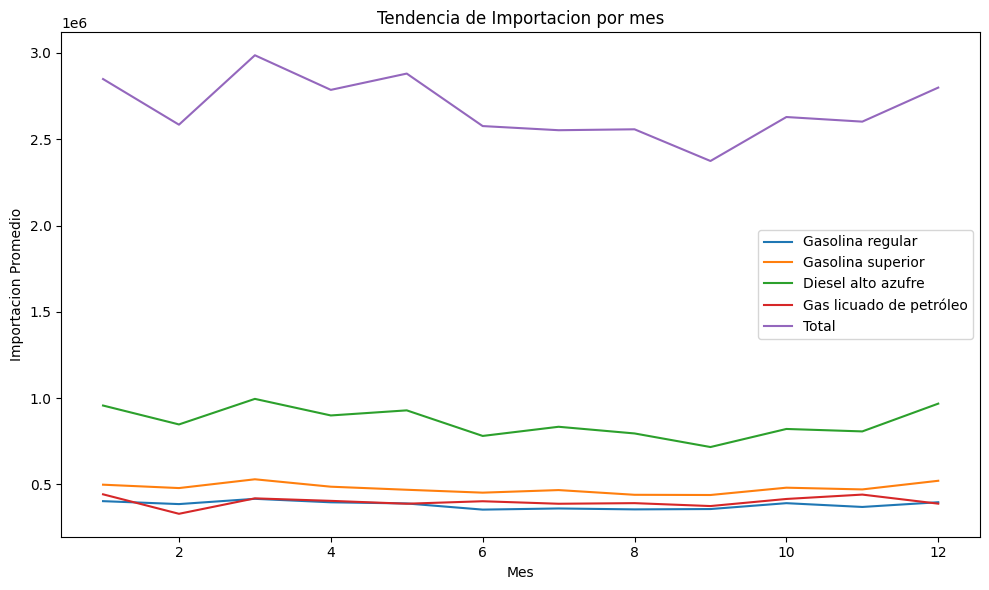

In [118]:

grupo = importacion.groupby(['MES']).mean()

tendencia = grupo[cuantitativas]
tendencia = tendencia.reset_index()

plt.figure(figsize=(10, 6))

for columna in cuantitativas:
    plt.plot(tendencia["MES"], tendencia[columna], label=columna)

plt.xlabel('Mes')
plt.ylabel('Importacion Promedio')
plt.title('Tendencia de Importacion por mes')
plt.legend()

plt.tight_layout()
plt.show()


Se puede observar que se mantiene constante la importacion de combustibles en los meses. Y se puede observar que se importa más el diesel.

In [119]:
from scipy.stats import normaltest
normality_test = importacion_numericas.apply(normaltest)
print("Resultados de test de normalidad: \n", normality_test)

Resultados de test de normalidad: 
    Gasolina regular  Gasolina superior  Diesel alto azufre  \
0         26.731272          27.221501            7.133463   
1          0.000002           0.000001            0.028248   

   Gas licuado de petróleo      Total  
0                25.680181  17.722492  
1                 0.000003   0.000142  


## 3. Analisis de las series

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa as tsa
import statsmodels as sm
from datetime import datetime
import os
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [121]:
tf.random.set_seed(123)
años_dict = {
    '00': '2000', '01': '2001', '02': '2002', '03': '2003', '04': '2004', '05': '2005',
    '06': '2006', '07': '2007', '08': '2008', '09': '2009', '10': '2010', '11': '2011',
    '12': '2012', '13': '2013', '14': '2014', '15': '2015', '16': '2016', '17': '2017',
    '18': '2018', '19': '2019', '20': '2020', '21': '2021', '22': '2022', '23': '2023',
}

meses_dict = {
    'ene': '01', 'feb': '02', 'mar': '03', 'abr': '04', 'may': '05', 'jun': '06',
    'jul': '07', 'ago': '08', 'sep': '09', 'oct': '10', 'nov': '11', 'dic': '12'
}

def dateparse(fecha):
    partes = fecha.split('-')
    partes[0] = meses_dict[partes[0]]
    partes[1] = años_dict[partes[1]]
    return pd.to_datetime('-'.join(partes), format='%m-%Y')

consumo = pd.read_csv('./Data/CONSUMO.csv', parse_dates=['Fecha'], index_col='Fecha',date_parser=dateparse)
print ('\n Parsed Data:')
consumo.head()

# casteamos las variables a float
for col in cuantitativas:
    consumo[col] = consumo[col].str.replace(',', '').astype(float)

train_size = int(len(consumo) * 0.7)
train_consumo, test_consumo = consumo[0:train_size], consumo[train_size:len(consumo)]

tr_consumo = train_consumo.copy()



 Parsed Data:


In [122]:
# precios_promedio

def dateparse(fecha):
    partes = fecha.split('-')
    partes[1] = meses_dict[partes[1]]
    return pd.to_datetime('-'.join(partes), format='%d-%m-%y')

precios_promedio_2021 = pd.read_csv('./Data/Precios-Promedio-Nacionales-Diarios-2021.csv', parse_dates=['FECHA'], index_col='FECHA',date_parser=dateparse)
precios_promedio_2022 = pd.read_csv('./Data/Precios-Promedio-Nacionales-Diarios-2022.csv', parse_dates=['FECHA'], index_col='FECHA',date_parser=dateparse)
precios_promedio_2023 = pd.read_csv('./Data/Precios-Promedio-Nacionales-Diarios-2023.csv', parse_dates=['FECHA'], index_col='FECHA',date_parser=dateparse)

pp = pd.concat([precios_promedio_2021, precios_promedio_2022, precios_promedio_2023])

# Se eliminan las columnas que no se van a utilizar
pp = pp.drop(columns=['Bunker'])

print ('\n Parsed Data:')
train_size = int(len(pp) * 0.7)
train_precios, test_precios = pp[0:train_size], pp[train_size:(len(pp))]
tr_precios = train_precios.copy()


 Parsed Data:


### 3.1 Consumo mensual gasolina regular

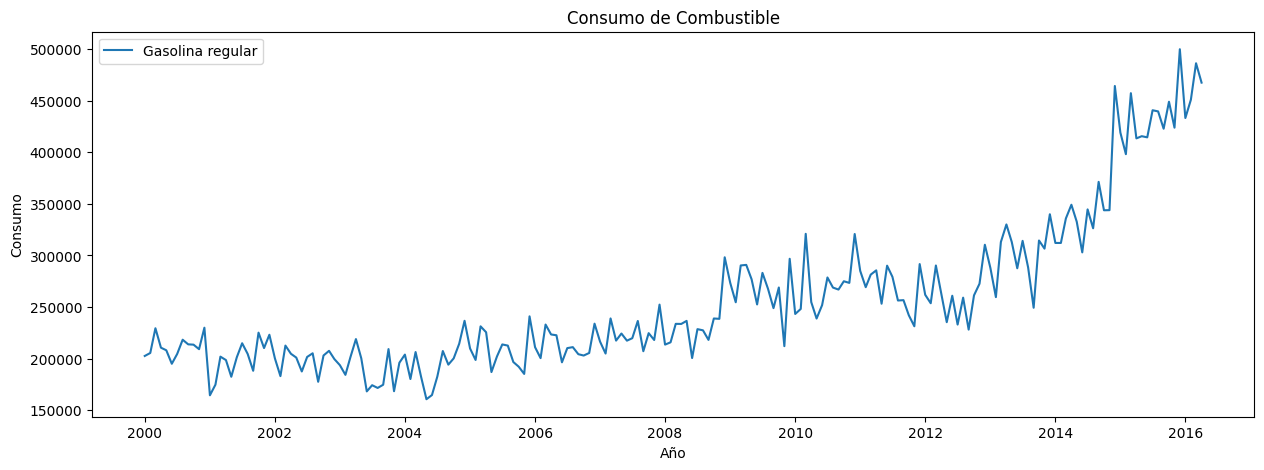

In [123]:
cuantitativas = ['Gas licuado de petróleo', 'Gasolina regular', 'Gasolina superior', 'Diesel alto azufre', 'Total']

plt.plot(tr_consumo.index, tr_consumo['Gasolina regular'], label='Gasolina regular')
plt.gca().set(title='Consumo de Combustible', ylabel='Consumo', xlabel='Año')
plt.legend()
plt.show()

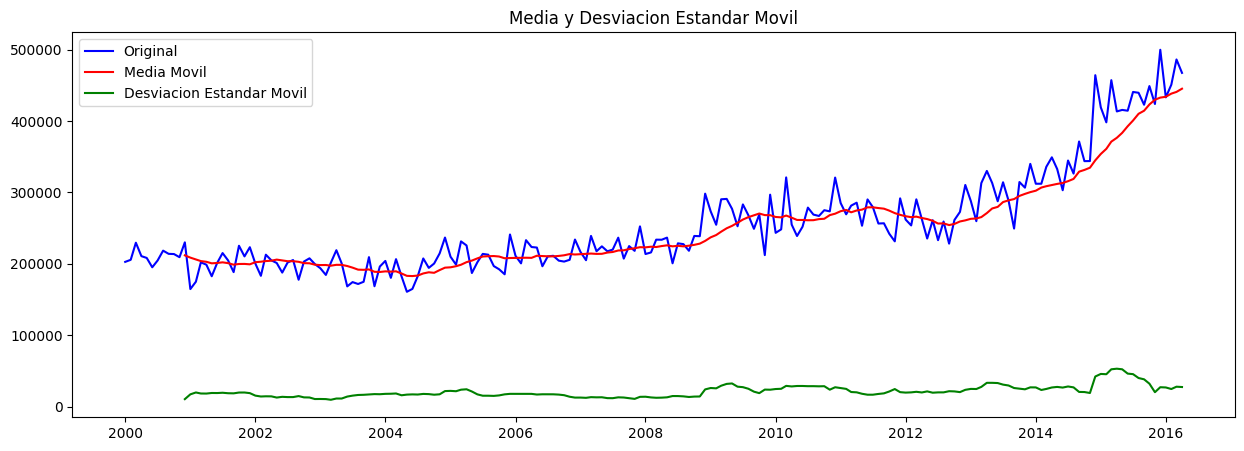

In [124]:
# Se calcula la media movil y desviacion estandar movil
# for column in cuantitativas:
mediaMovil = tr_consumo['Gasolina regular'].rolling(window=12).mean()
desviacionMovil = tr_consumo['Gasolina regular'].rolling(window=12).std()

original = plt.plot(tr_consumo['Gasolina regular'], color='blue', label='Original')
media = plt.plot(mediaMovil, color='red', label='Media Movil')
desviacion = plt.plot(desviacionMovil, color='green', label='Desviacion Estandar Movil')
plt.legend(loc='best')
plt.title('Media y Desviacion Estandar Movil')
plt.show(block=False)

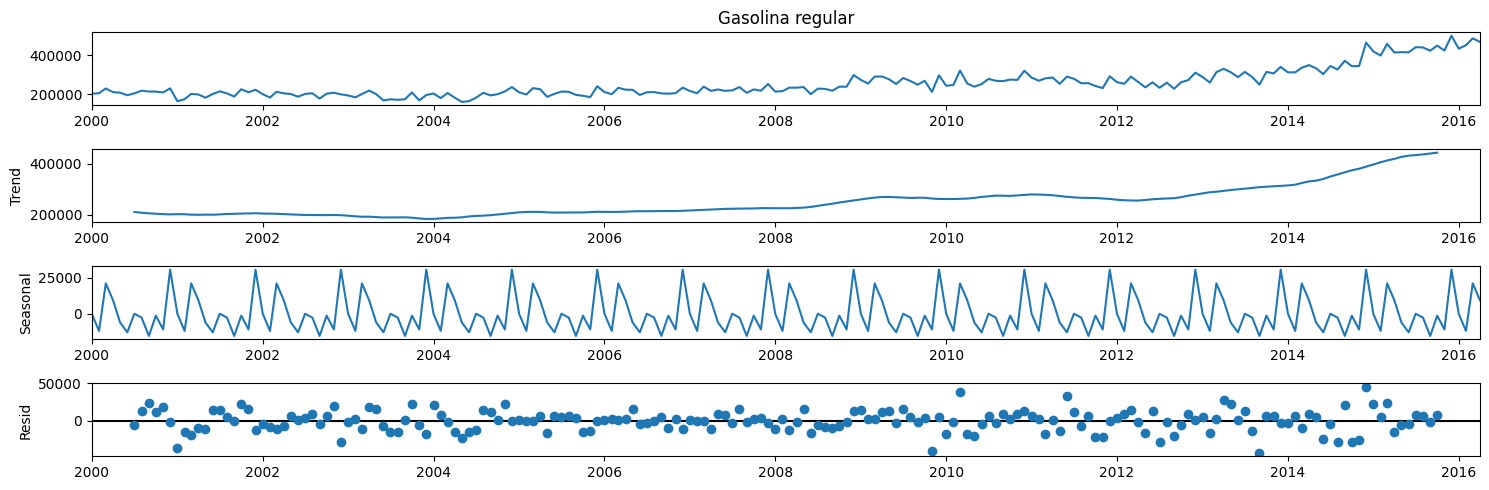

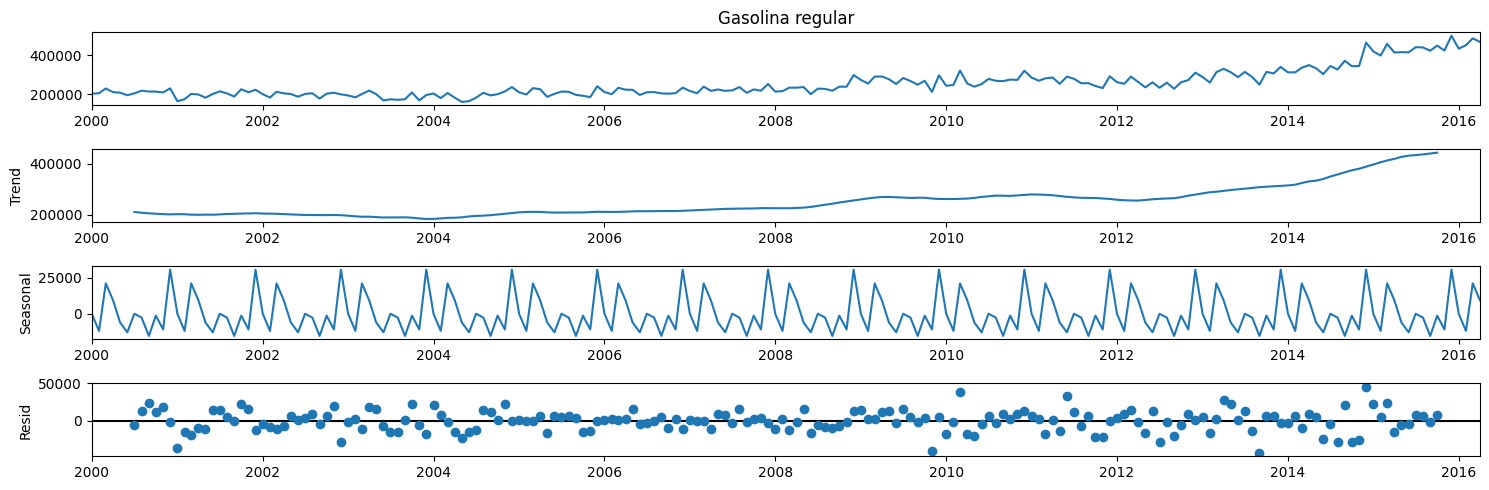

In [125]:
descomposition = seasonal_decompose(tr_consumo['Gasolina regular'])
descomposition.plot()

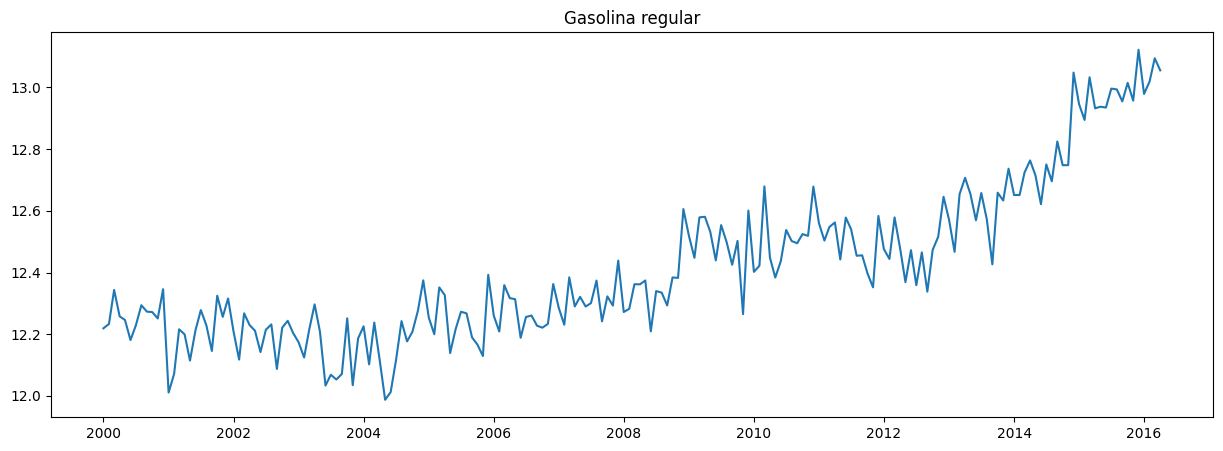

In [126]:
consumo_log = tr_consumo.copy()

# for column in cuantitativas:
consumo_log['Gasolina regular'] = np.log(consumo_log['Gasolina regular'])
plt.plot(consumo_log['Gasolina regular'])
plt.title('Gasolina regular')
plt.show()

In [127]:
# for column in cuantitativas:
print('Resultados del Test de Dicker-Fuller para la variable Gasolina regular')
dfTest = adfuller(tr_consumo['Gasolina regular'], autolag='AIC')
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)
    

Resultados del Test de Dicker-Fuller para la variable Gasolina regular
Estadístico de prueba          2.335407
p-value                        0.998977
# de retardos usados          12.000000
# de observaciones usadas    183.000000
Critical Value (1%)           -3.466598
Critical Value (5%)           -2.877467
Critical Value (10%)          -2.575260
dtype: float64


El p-value es mayor a 0.05 por lo que no se puede rechazar la hipótesis nula de que existen raices unitarias. La serie no es estacionaria en media.

In [128]:
consumo_diff = tr_consumo.diff()
consumo_diff.dropna(inplace=True)

# for column in cuantitativas:
print('Resultados del Test de Dickey Fuller para una diferenciación de la serie')
dfTest = adfuller(consumo_diff['Gasolina regular'])
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)

Resultados del Test de Dickey Fuller para una diferenciación de la serie
Estadístico de prueba         -3.948106
p-value                        0.001708
# de retardos usados          11.000000
# de observaciones usadas    183.000000
Critical Value (1%)           -3.466598
Critical Value (5%)           -2.877467
Critical Value (10%)          -2.575260
dtype: float64


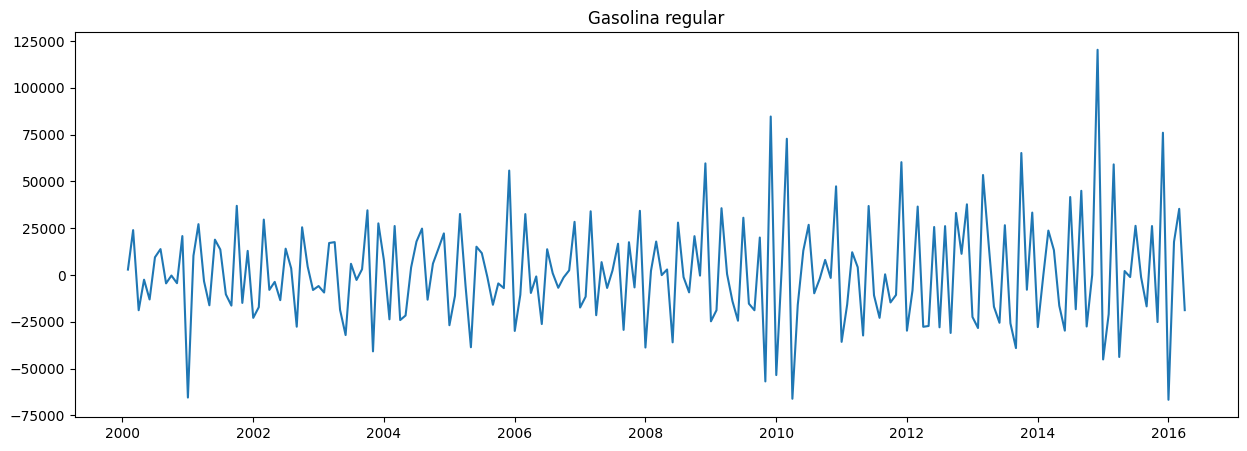

In [129]:
# for column in cuantitativas:
plt.plot(consumo_diff['Gasolina regular'], label='Gasolina regular')
plt.title('Gasolina regular')
plt.show()

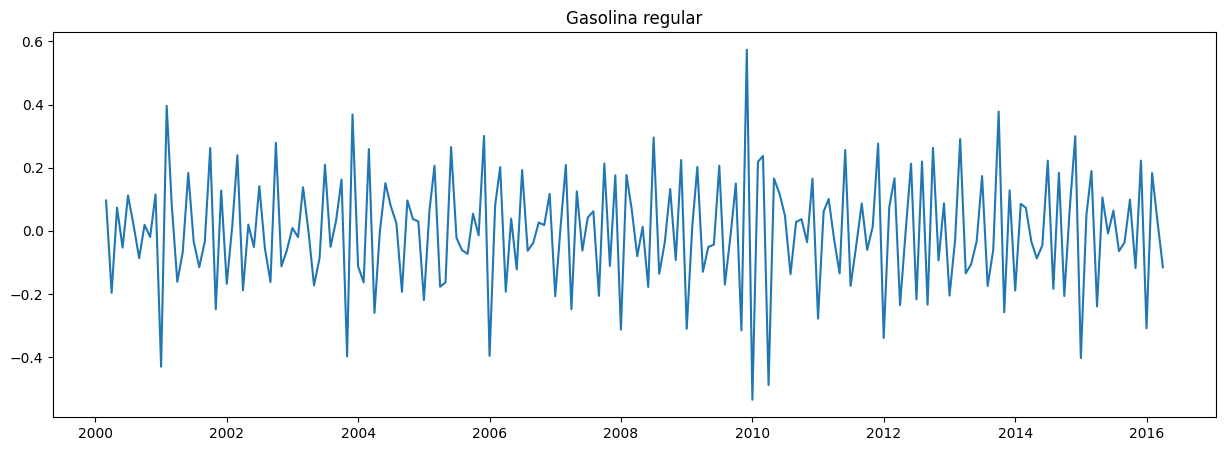

In [130]:
# for column in cuantitativas:
plt.plot(consumo_log['Gasolina regular'].diff().diff())
plt.title('Gasolina regular')
plt.show()

In [131]:
consumo_log_diff = pd.DataFrame(columns = cuantitativas)

# for column in cuantitativas:

consumo_log_diff_act = consumo_log['Gasolina regular'].diff().diff()
consumo_log_diff_act.dropna(inplace = True)
consumo_log_diff['Gasolina regular'] = consumo_log_diff_act
tsa_acf = acf(consumo_log_diff_act, nlags=5,fft=False)
tsa_pacf = pacf(consumo_log_diff_act, nlags=36)



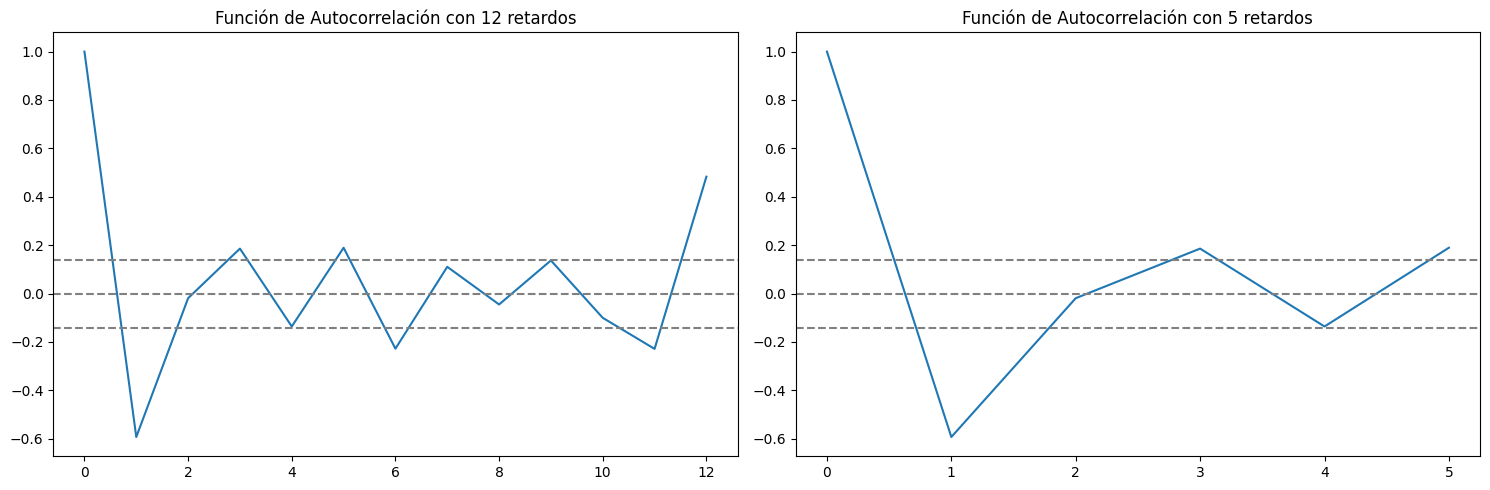

In [132]:

#Plot ACF: 
# for column in cuantitativas:
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

plt.subplot(121) 
plt.plot(acf(consumo_log_diff['Gasolina regular'],nlags=12,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(consumo_log_diff['Gasolina regular'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(consumo_log_diff['Gasolina regular'])),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 12 retardos')

plt.subplot(122) 
plt.plot(acf(consumo_log_diff['Gasolina regular'],nlags=5,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(consumo_log_diff['Gasolina regular'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(consumo_log_diff['Gasolina regular'])),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 5 retardos')

plt.tight_layout()

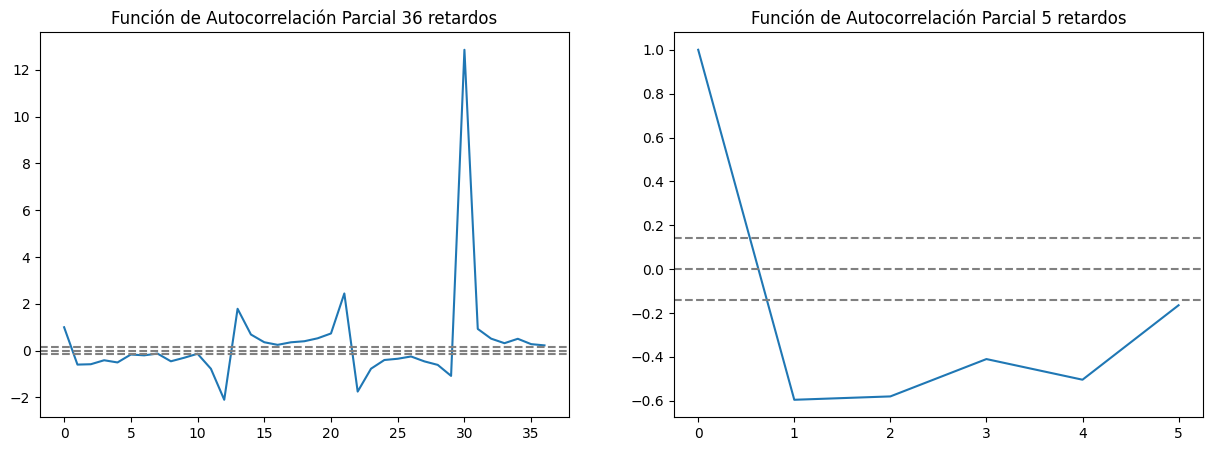

In [133]:
#plot PACF
# for column in cuantitativas:
plt.subplot(121)
plt.plot(pacf(consumo_log_diff['Gasolina regular'], nlags=36))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(consumo_log_diff['Gasolina regular'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(consumo_log_diff['Gasolina regular'])),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 36 retardos')

plt.subplot(122)
plt.plot(pacf(consumo_log_diff['Gasolina regular'], nlags=5))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(consumo_log_diff['Gasolina regular'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(consumo_log_diff['Gasolina regular'])),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 5 retardos')

plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100

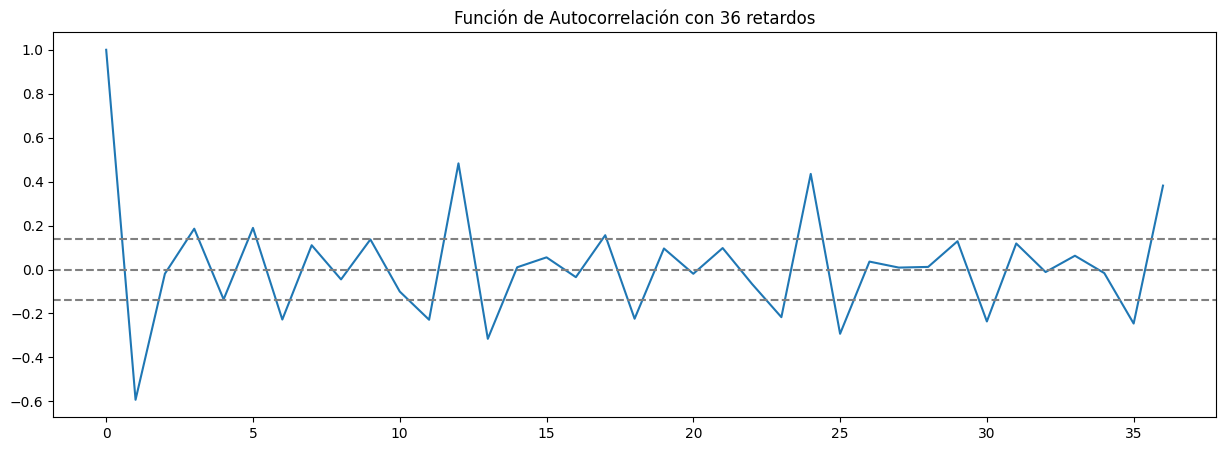

In [134]:

plt.plot(acf(consumo_log_diff['Gasolina regular'],nlags=36,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(consumo_log_diff['Gasolina regular'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(consumo_log_diff['Gasolina regular'])),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 36 retardos')
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

Como se puede observar el comportamiento es similar para 12, 24, 36 meses por lo que hay una correlación entre los años, eso indica que hay estacionalidad cada 12 meses. Deberíamos agregarle el componente estacional

In [135]:
consumo_log_D = consumo_log.diff(12)
consumo_log_D.dropna(inplace=True)

Text(0.5, 1.0, 'Función de Autocorrelación Parcial 5 retardos')

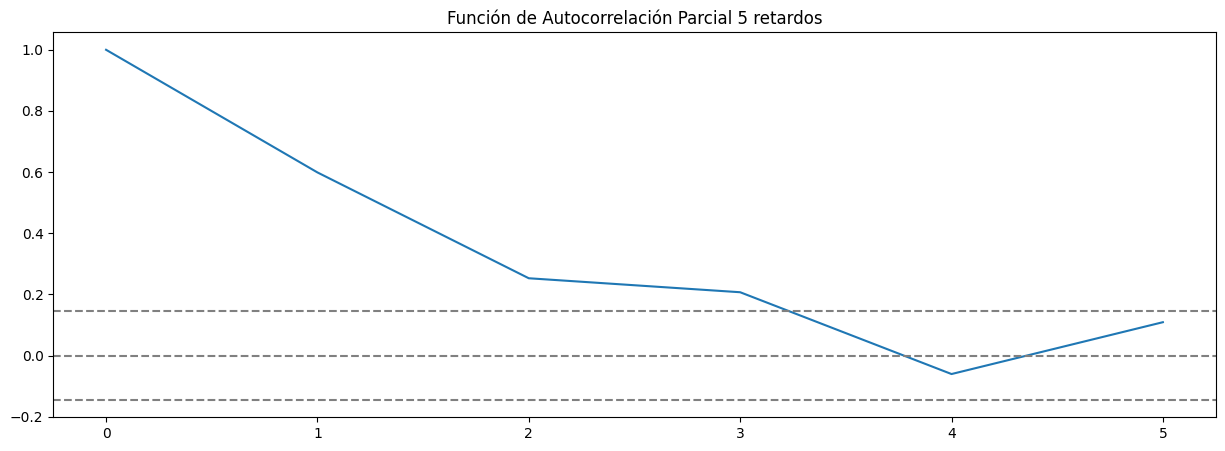

In [136]:

plt.plot(pacf(consumo_log_D['Gasolina regular'], nlags=5))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(consumo_log_D['Gasolina regular'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(consumo_log_D['Gasolina regular'])),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 5 retardos')

Luego de hacer la diferenciacion se puede ver que se anulan los coeficientes despues de p = 4. Se probara con p = 4, d = 3, q = 2

c:\Users\Juan_Avila\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Juan_Avila\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6864      0.062    -11.108      0.000      -0.808      -0.565
ma.L1         -1.0000    111.256     -0.009      0.993    -219.057     217.057
ar.S.L12      -0.6064      0.074     -8.226      0.000      -0.751      -0.462
ar.S.L24      -0.2746      0.074     -3.721      0.000      -0.419      -0.130
sigma2         0.0384      4.275      0.009      0.993      -8.340       8.416


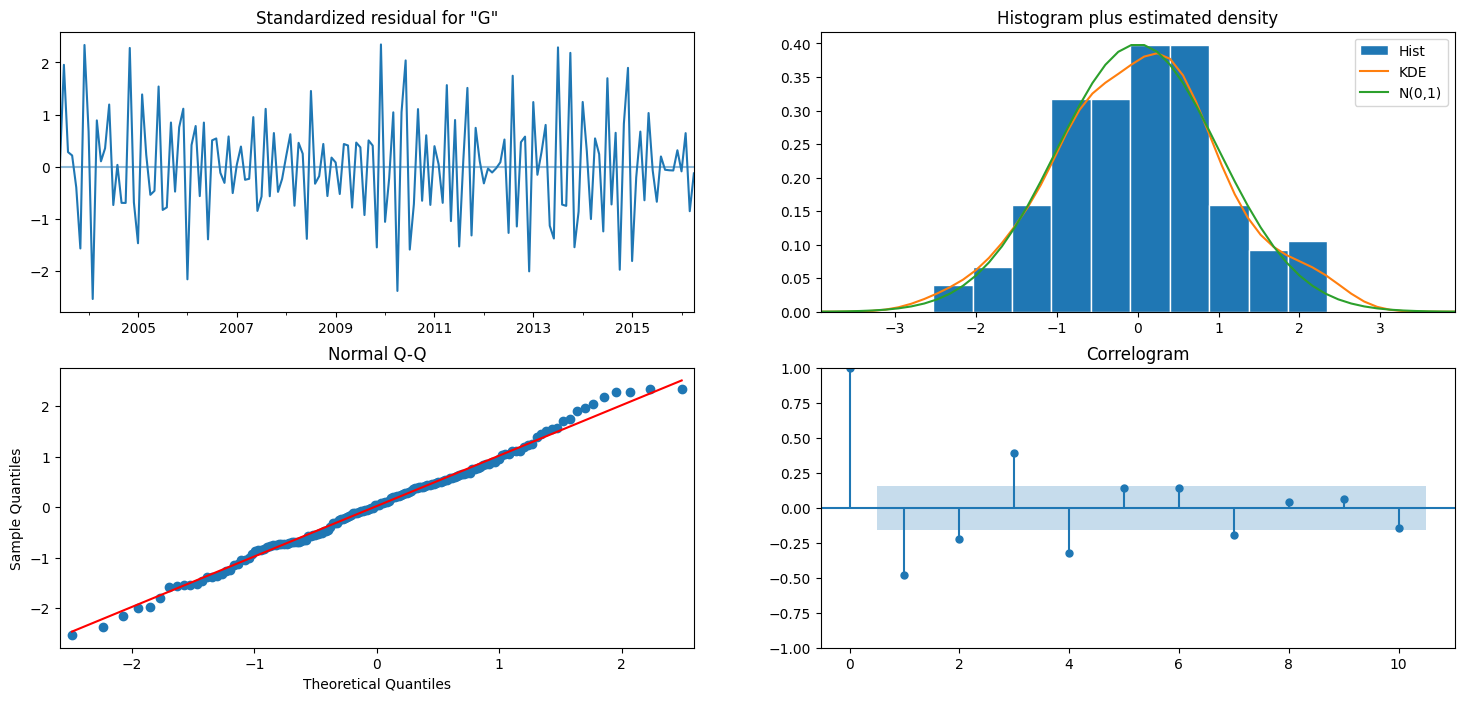

Resultados de AIC (Akaike information criterion)
Modelo 141= -50.54617542041347
Resultados de BIC (Bayesian information criterion)
Modelo 141= -35.32904983581724


In [137]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

modelo141 = SARIMAX(consumo_log['Gasolina regular'], order=(1,4,1), seasonal_order=(2,1,0,12), enforce_stationarity=False, enforce_invertibility=False)
resultado_m141 = modelo141.fit()
print(resultado_m141.summary().tables[1])

resultado_m141.plot_diagnostics(figsize=(18, 8))
plt.show()

print("Resultados de AIC (Akaike information criterion)")
print("Modelo 141=",resultado_m141.aic)
print("Resultados de BIC (Bayesian information criterion)")
print("Modelo 141=",resultado_m141.bic)


Los residuos de las columnas tienen una distribucion normal y en el correlograma hay pocas autocorrelaciones significativas, por lo que se puede decir que el modelo es bueno.

c:\Users\Juan_Avila\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Juan_Avila\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5651      0.077    -20.396      0.000      -1.715      -1.415
ar.L2         -1.5190      0.139    -10.955      0.000      -1.791      -1.247
ar.L3         -0.8872      0.138     -6.420      0.000      -1.158      -0.616
ar.L4         -0.3731      0.088     -4.217      0.000      -0.547      -0.200
ma.L1         -1.0000    148.118     -0.007      0.995    -291.305     289.305
ar.S.L12      -0.6123      0.081     -7.597      0.000      -0.770      -0.454
ar.S.L24      -0.2942      0.082     -3.575      0.000      -0.455      -0.133
sigma2         0.0152      2.255      0.007      0.995      -4.404       4.435


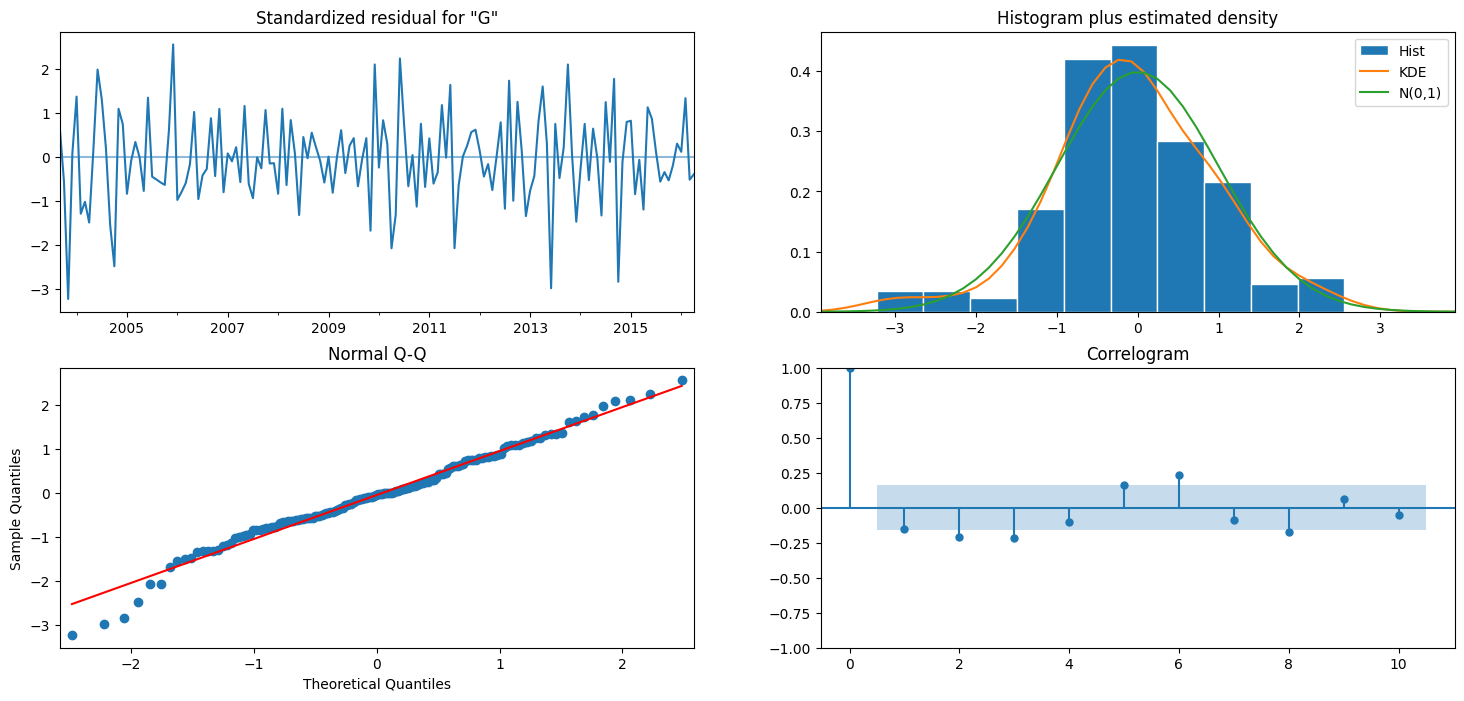

Resultados de AIC (Akaike information criterion)
Modelo 441= -183.74537376482712
Resultados de BIC (Bayesian information criterion)
Modelo 441= -159.5543295980569


In [138]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

modelo441 = SARIMAX(consumo_log['Gasolina regular'], order=(4,4,1), seasonal_order=(2,1,0,12), enforce_stationarity=False, enforce_invertibility=False)
resultado_m441 = modelo441.fit()
print(resultado_m441.summary().tables[1])

resultado_m441.plot_diagnostics(figsize=(18, 8))
plt.show()

print("Resultados de AIC (Akaike information criterion)")
print("Modelo 441=",resultado_m441.aic)
print("Resultados de BIC (Bayesian information criterion)")
print("Modelo 441=",resultado_m441.bic)



Basándonos en estos resultados, el Modelo 441 sería considerado el mejor modelo de los dos, ya que tiene un mejor ajuste a los datos según el criterio de información de AIC

#### Prediccion con el modelo 441

c:\Users\Juan_Avila\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Juan_Avila\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


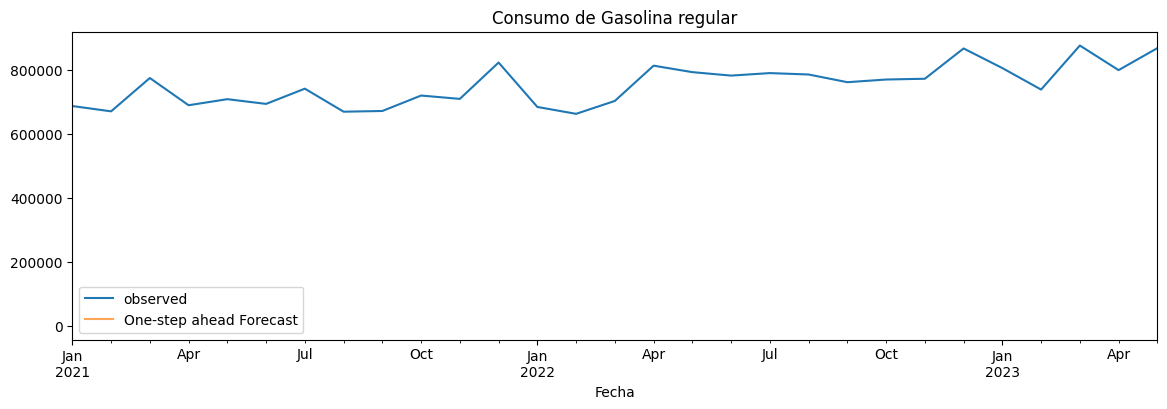

In [139]:

modelo441 = SARIMAX(consumo_log['Gasolina regular'], order=(4,4,1), seasonal_order=(2,1,0,12), enforce_stationarity=False, enforce_invertibility=False)
resultado_m441 = modelo441.fit()

pred = resultado_m441.get_prediction(start=test_consumo['Gasolina regular']['2021':].index[0], dynamic=False)
pred_ci = pred.conf_int()
ax = test_consumo['Gasolina regular']['2021':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between( pred_ci.iloc[:,0],
                pred_ci.iloc[:,1], color='k', alpha=.2)

# plt.xlim(test_consumo[column]['2023':].index[0], pred_ci.index[-1])
plt.title('Consumo de Gasolina regular')
plt.legend()
plt.show()



##### 2021 - 2023
Se puede observar que se predice que el consumo de gasolina regular va a aumentando levemente desde el 2021. Es una predicción acertada ya que el consumo de gasolina sí ha aumentado con el aumento de vehículos que hay cada año en el país.

c:\Users\Juan_Avila\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Juan_Avila\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


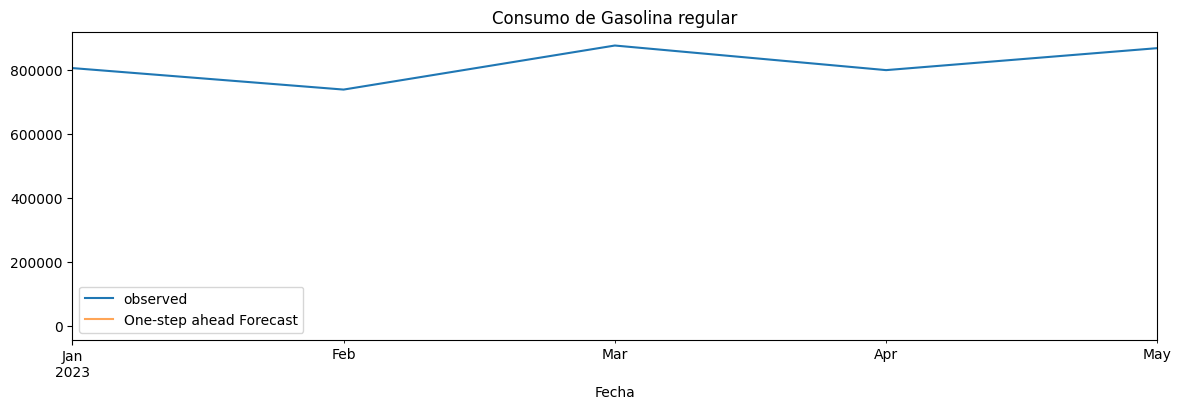

In [140]:

modelo441 = SARIMAX(consumo_log['Gasolina regular'], order=(4,4,1), seasonal_order=(2,1,0,12), enforce_stationarity=False, enforce_invertibility=False)
resultado_m441 = modelo441.fit()

pred = resultado_m441.get_prediction(start=test_consumo['Gasolina regular']['2023':].index[0], dynamic=False)
pred_ci = pred.conf_int()
ax = test_consumo['Gasolina regular']['2023':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
plt.title('Consumo de Gasolina regular')
plt.legend()
plt.show()

##### 2023
Segun la prediccion, el consumo de gasolina regular sera constante en el año 2023, con un leve aumento lo que concuerda con los valores reales analizados en el análisis exploratorio de datos.

### 3.2 Consumo mensual gasolina superior

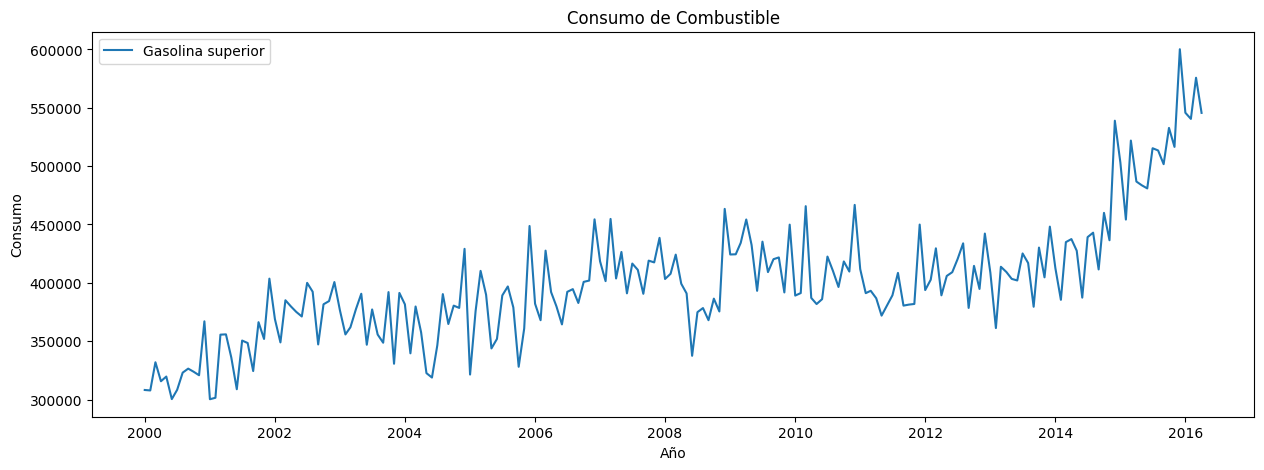

In [141]:
plt.plot(tr_consumo.index, tr_consumo['Gasolina superior'], label='Gasolina superior')
plt.gca().set(title='Consumo de Combustible', ylabel='Consumo', xlabel='Año')
plt.legend()
plt.show()

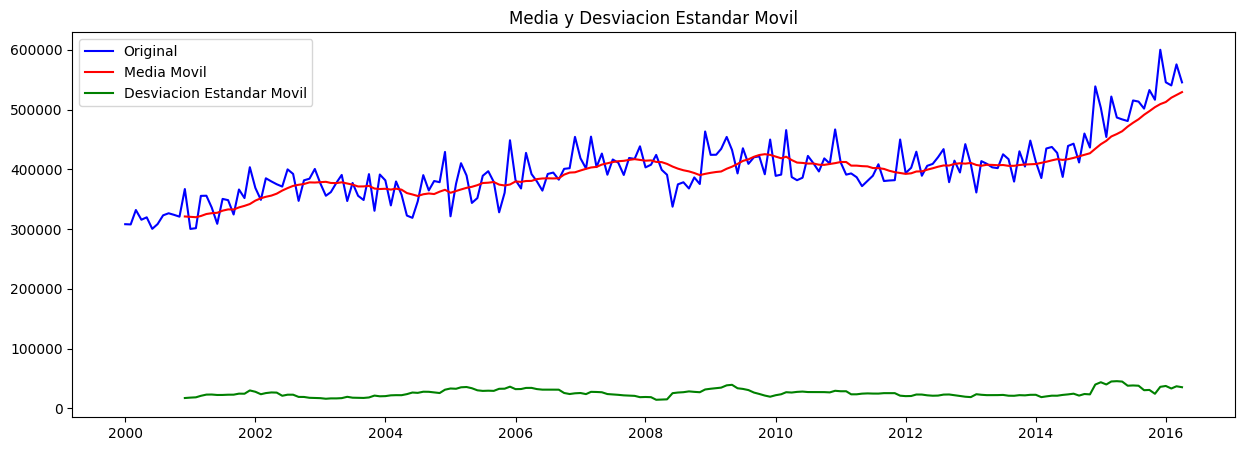

In [142]:
mediaMovil = tr_consumo['Gasolina superior'].rolling(window=12).mean()
desviacionMovil = tr_consumo['Gasolina superior'].rolling(window=12).std()

original = plt.plot(tr_consumo['Gasolina superior'], color='blue', label='Original')
media = plt.plot(mediaMovil, color='red', label='Media Movil')
desviacion = plt.plot(desviacionMovil, color='green', label='Desviacion Estandar Movil')
plt.legend(loc='best')
plt.title('Media y Desviacion Estandar Movil')
plt.show(block=False)

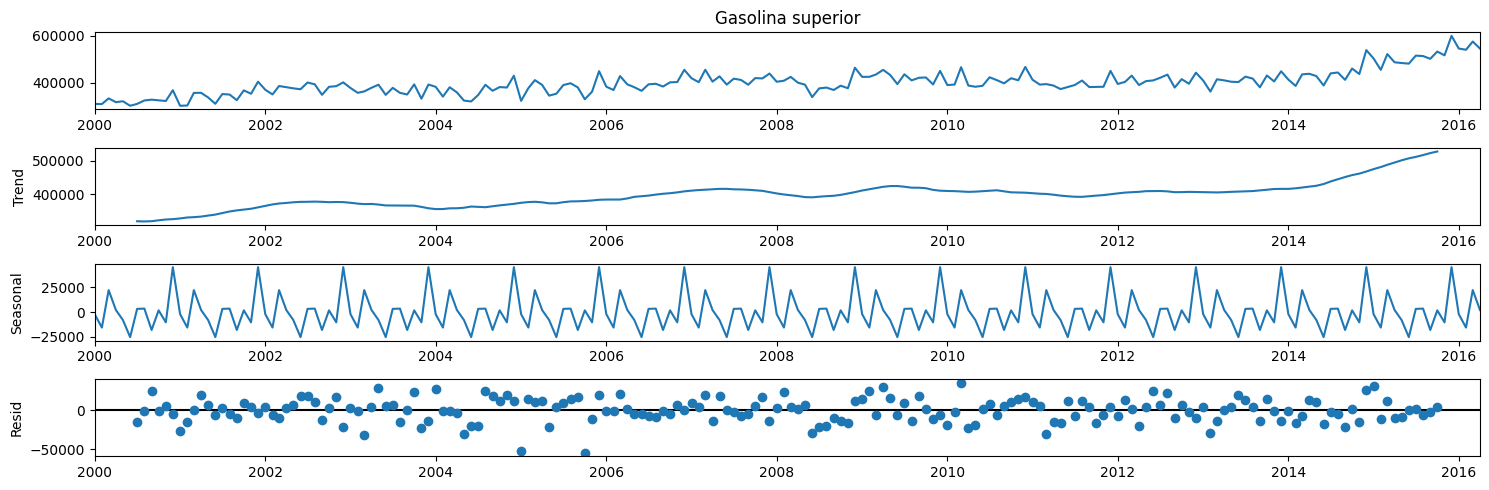

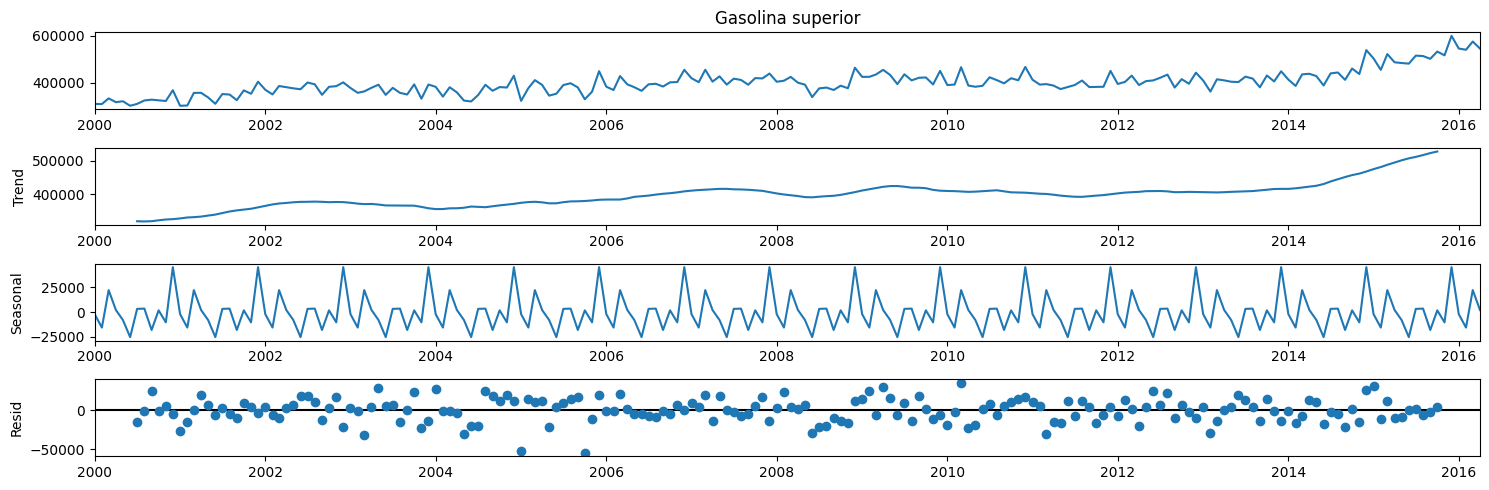

In [143]:
descomposition = seasonal_decompose(tr_consumo['Gasolina superior'])
descomposition.plot()

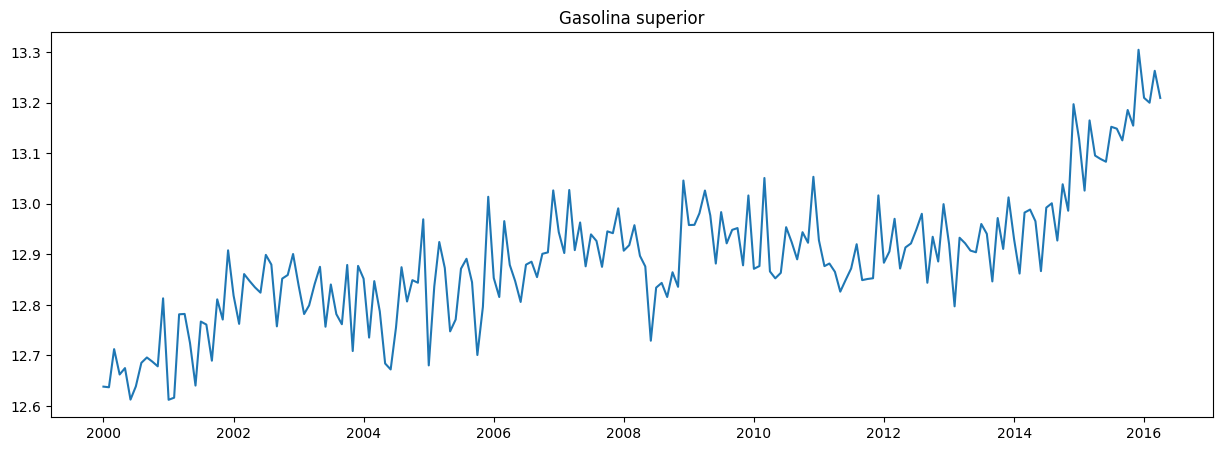

In [144]:
consumo_log = tr_consumo.copy()

# for column in cuantitativas:
consumo_log['Gasolina superior'] = np.log(consumo_log['Gasolina superior'])
plt.plot(consumo_log['Gasolina superior'])
plt.title('Gasolina superior')
plt.show()

In [145]:
print('Resultados del Test de Dicker-Fuller para la variable Gasolina superior')
dfTest = adfuller(tr_consumo['Gasolina superior'], autolag='AIC')
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)

Resultados del Test de Dicker-Fuller para la variable Gasolina superior
Estadístico de prueba          0.466725
p-value                        0.983826
# de retardos usados          12.000000
# de observaciones usadas    183.000000
Critical Value (1%)           -3.466598
Critical Value (5%)           -2.877467
Critical Value (10%)          -2.575260
dtype: float64


In [146]:
consumo_diff = tr_consumo.diff()
consumo_diff.dropna(inplace=True)

# for column in cuantitativas:
print('Resultados del Test de Dickey Fuller para una diferenciación de la serie')
dfTest = adfuller(consumo_diff['Gasolina superior'])
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)

Resultados del Test de Dickey Fuller para una diferenciación de la serie
Estadístico de prueba         -4.253410
p-value                        0.000534
# de retardos usados          11.000000
# de observaciones usadas    183.000000
Critical Value (1%)           -3.466598
Critical Value (5%)           -2.877467
Critical Value (10%)          -2.575260
dtype: float64


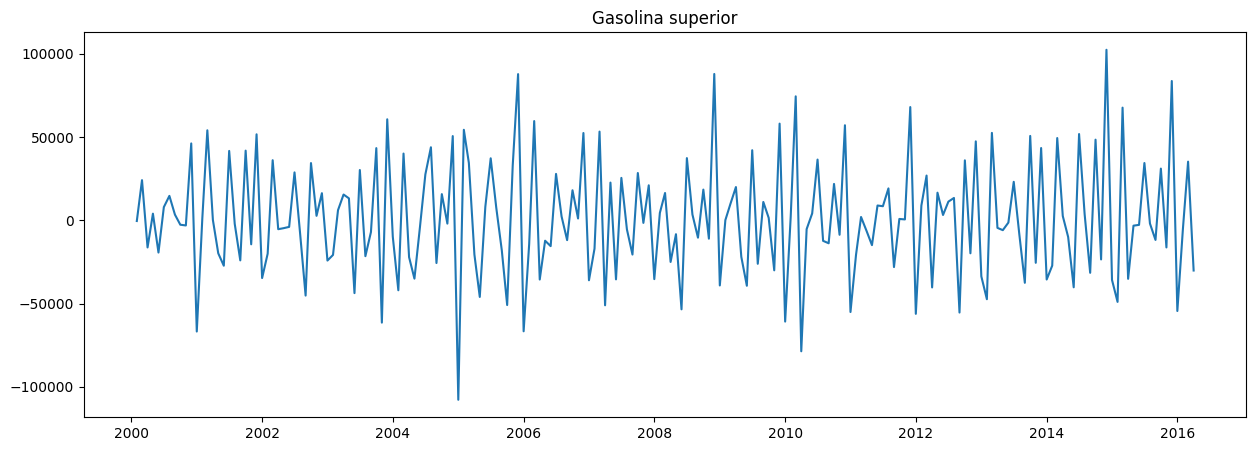

In [147]:
plt.plot(consumo_diff['Gasolina superior'], label='Gasolina superior')
plt.title('Gasolina superior')
plt.show()

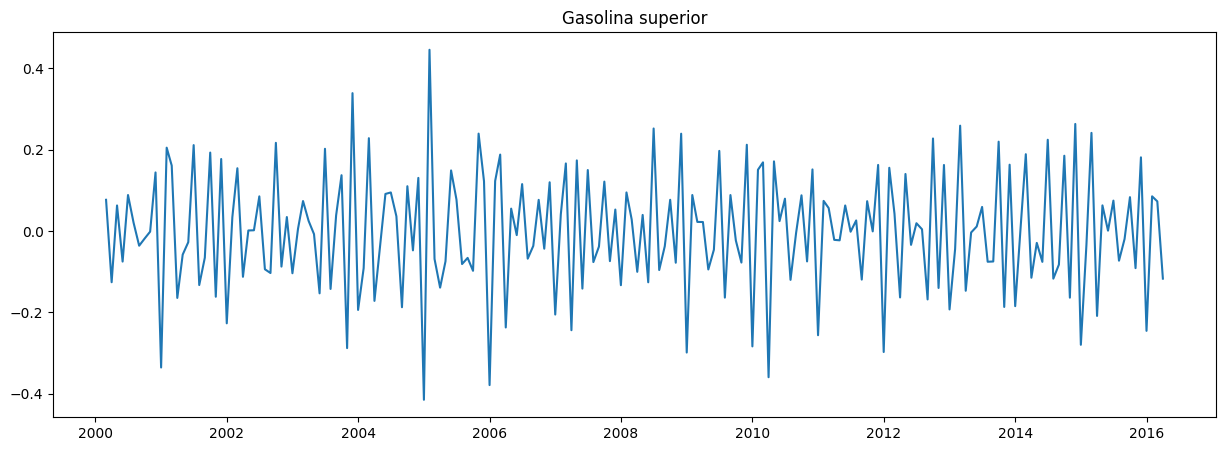

In [148]:
plt.plot(consumo_log['Gasolina superior'].diff().diff())
plt.title('Gasolina superior')
plt.show()

In [149]:
consumo_log_diff = pd.DataFrame(columns = cuantitativas)

consumo_log_diff_act = consumo_log['Gasolina superior'].diff().diff()
consumo_log_diff_act.dropna(inplace = True)
consumo_log_diff['Gasolina superior'] = consumo_log_diff_act
tsa_acf = acf(consumo_log_diff_act, nlags=5,fft=False)
tsa_pacf = pacf(consumo_log_diff_act, nlags=36)

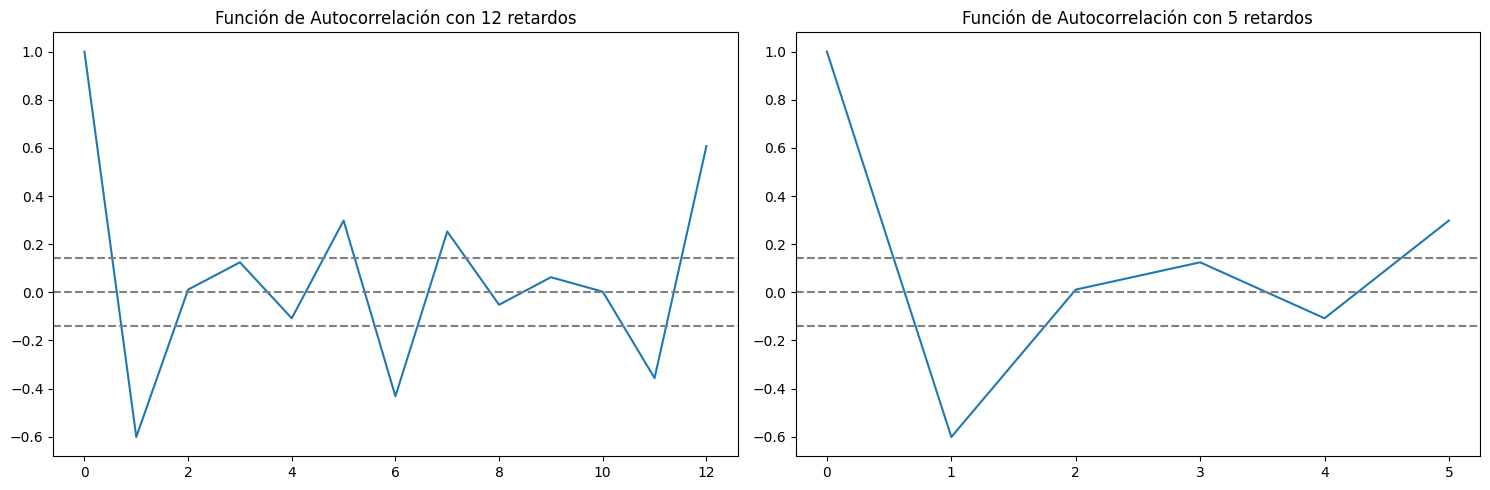

In [150]:
#Plot ACF: 
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

plt.subplot(121) 
plt.plot(acf(consumo_log_diff['Gasolina superior'],nlags=12,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(consumo_log_diff['Gasolina superior'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(consumo_log_diff['Gasolina superior'])),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 12 retardos')

plt.subplot(122) 
plt.plot(acf(consumo_log_diff['Gasolina superior'],nlags=5,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(consumo_log_diff['Gasolina superior'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(consumo_log_diff['Gasolina superior'])),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 5 retardos')

plt.tight_layout()

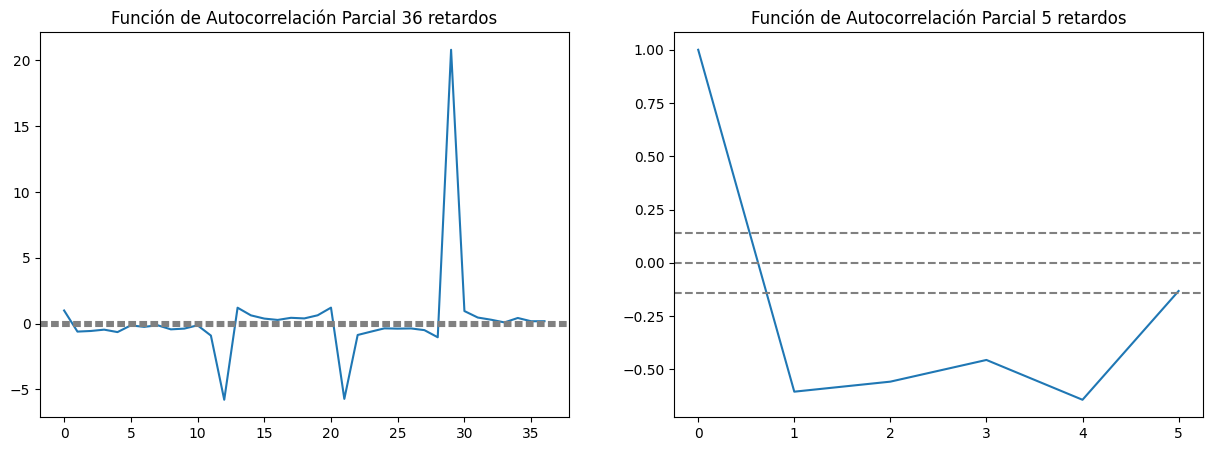

In [151]:
#plot PACF

plt.subplot(121)
plt.plot(pacf(consumo_log_diff['Gasolina superior'], nlags=36))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(consumo_log_diff['Gasolina superior'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(consumo_log_diff['Gasolina superior'])),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 36 retardos')

plt.subplot(122)
plt.plot(pacf(consumo_log_diff['Gasolina superior'], nlags=5))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(consumo_log_diff['Gasolina superior'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(consumo_log_diff['Gasolina superior'])),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 5 retardos')

plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100

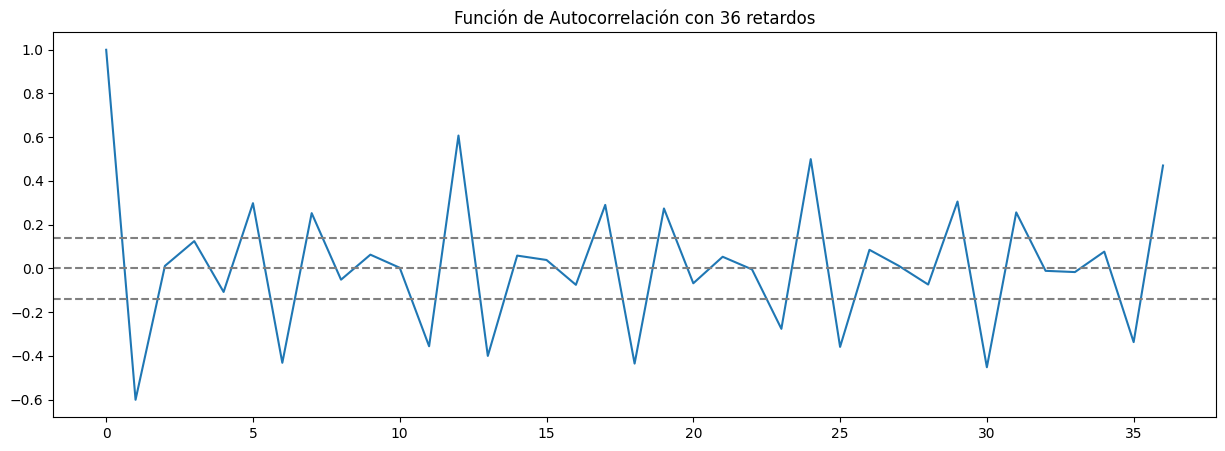

In [152]:
plt.plot(acf(consumo_log_diff['Gasolina superior'],nlags=36,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(consumo_log_diff['Gasolina superior'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(consumo_log_diff['Gasolina superior'])),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 36 retardos')
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [153]:
consumo_log_D = consumo_log.diff(12)
consumo_log_D.dropna(inplace=True)

Text(0.5, 1.0, 'Función de Autocorrelación Parcial 5 retardos')

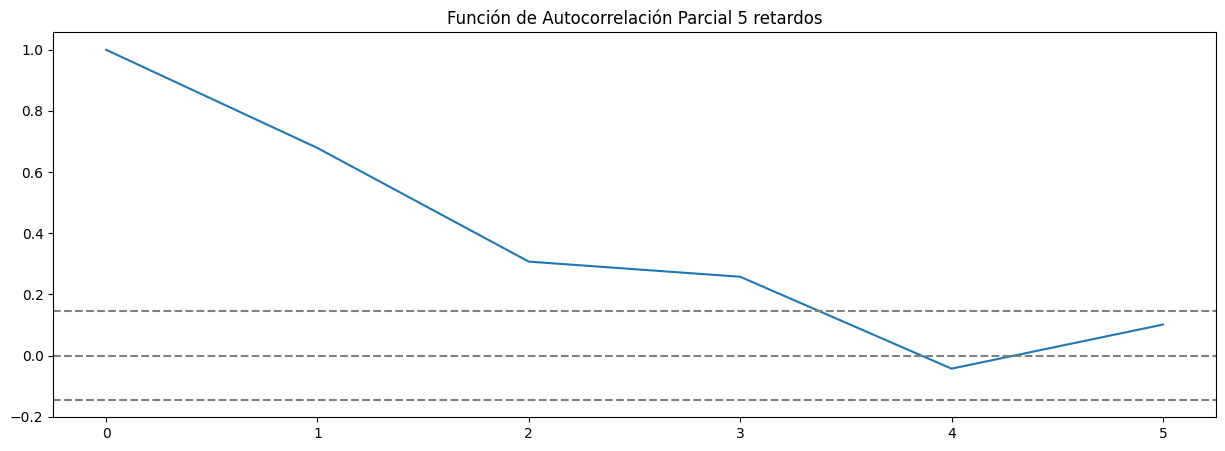

In [154]:
plt.plot(pacf(consumo_log_D['Gasolina regular'], nlags=5))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(consumo_log_D['Gasolina regular'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(consumo_log_D['Gasolina regular'])),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 5 retardos')

Luego de hacer la diferenciacion se puede ver que se anulan los coeficientes despues de p = 4. Se probara con p = 4, d = 3, q = 2

c:\Users\Juan_Avila\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Juan_Avila\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6704      0.056    -12.065      0.000      -0.779      -0.562
ma.L1         -1.0000    192.729     -0.005      0.996    -378.741     376.741
ar.S.L12      -0.5697      0.067     -8.440      0.000      -0.702      -0.437
ar.S.L24      -0.3047      0.089     -3.442      0.001      -0.478      -0.131
sigma2         0.0220      4.233      0.005      0.996      -8.274       8.318


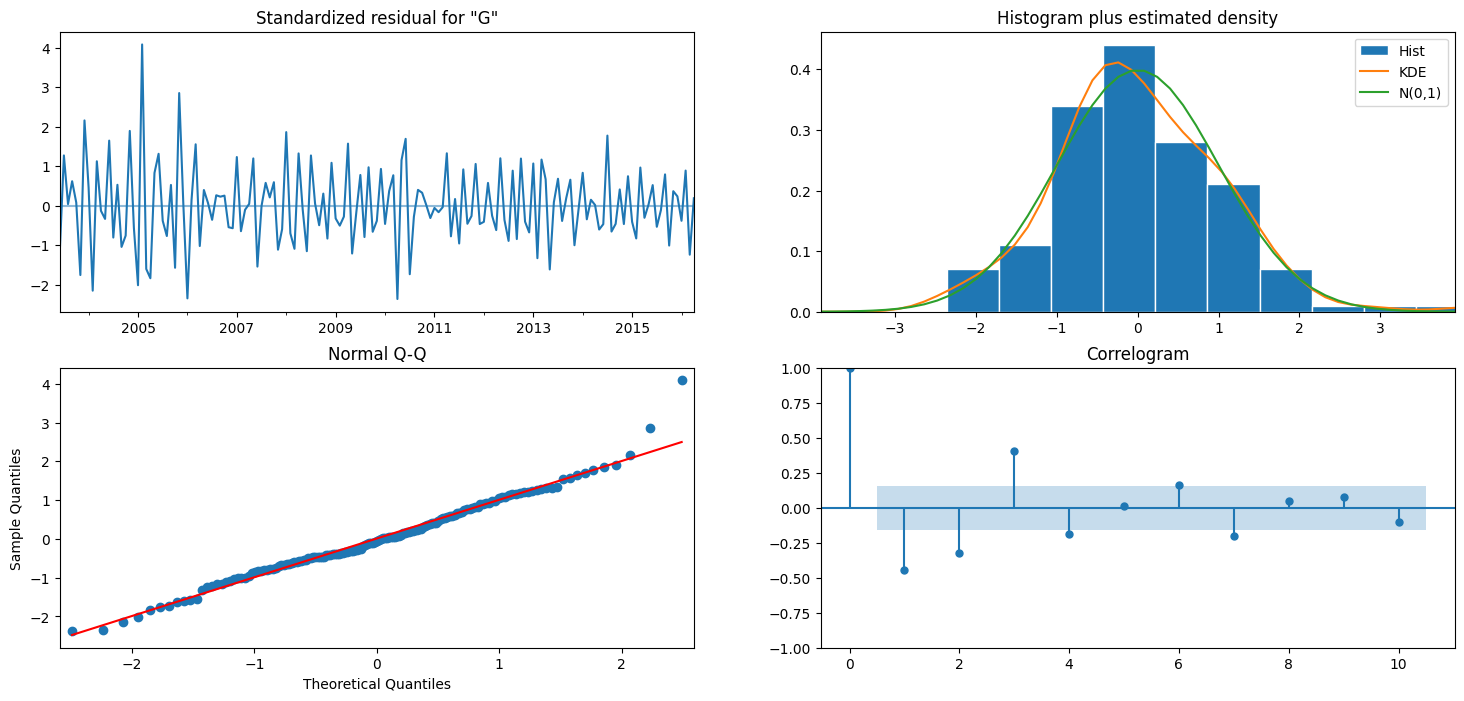

In [155]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

modelo141 = SARIMAX(consumo_log['Gasolina superior'], order=(1,4,1), seasonal_order=(2,1,0,12), enforce_stationarity=False, enforce_invertibility=False)
resultado_m141 = modelo141.fit()
print(resultado_m141.summary().tables[1])

resultado_m141.plot_diagnostics(figsize=(18, 8))
plt.show()


c:\Users\Juan_Avila\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Juan_Avila\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5881      0.078    -20.475      0.000      -1.740      -1.436
ar.L2         -1.6025      0.151    -10.599      0.000      -1.899      -1.306
ar.L3         -0.9805      0.151     -6.482      0.000      -1.277      -0.684
ar.L4         -0.3752      0.090     -4.148      0.000      -0.553      -0.198
ma.L1         -1.0000   7845.337     -0.000      1.000   -1.54e+04    1.54e+04
ar.S.L12      -0.5685      0.064     -8.848      0.000      -0.694      -0.443
ar.S.L24      -0.3472      0.093     -3.733      0.000      -0.529      -0.165
sigma2         0.0085     66.709      0.000      1.000    -130.739     130.756


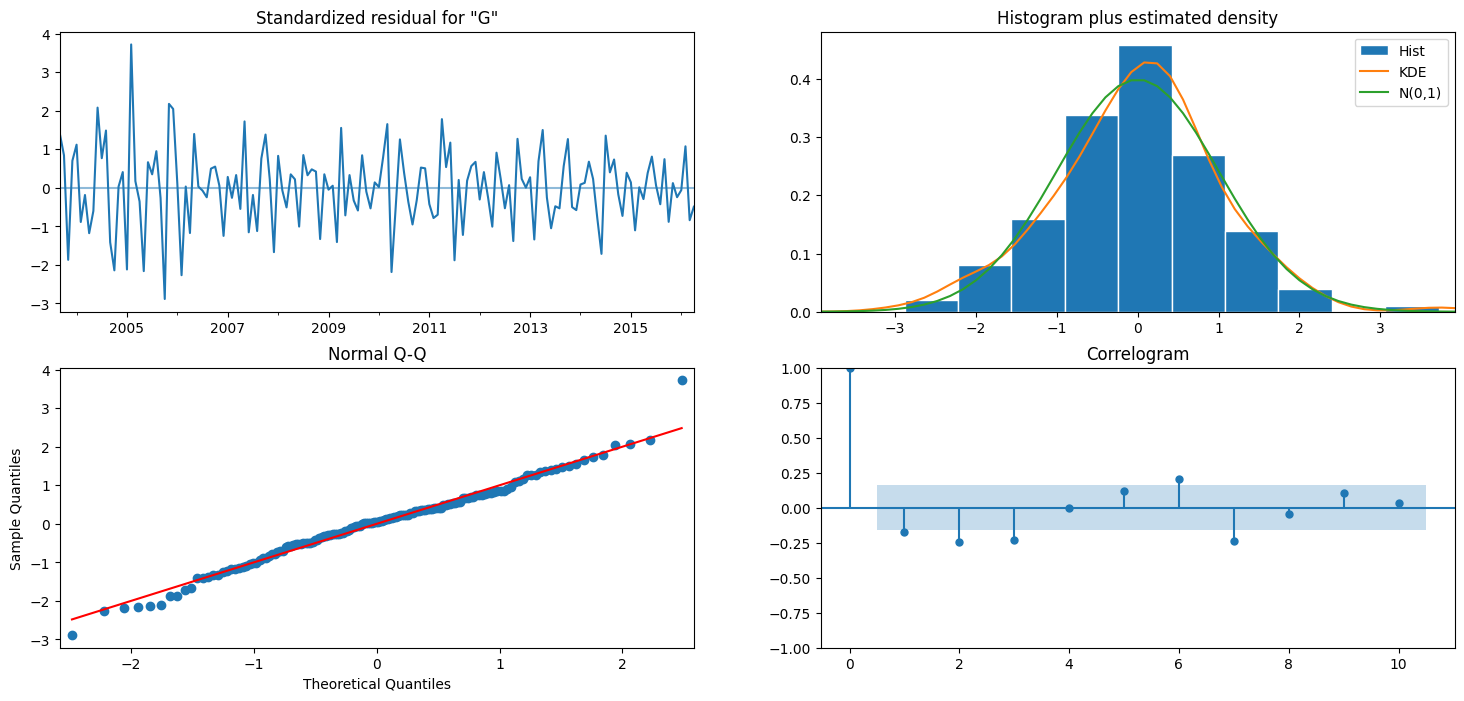

Resultados de AIC (Akaike information criterion)
Modelo 441= -272.2222825891066
Resultados de BIC (Bayesian information criterion)
Modelo 441= -248.0312384223364
Resultados de AIC (Akaike information criterion)
Modelo 141= -137.06345303440986
Resultados de BIC (Bayesian information criterion)
Modelo 141= -121.84632744981363


In [156]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

modelo441 = SARIMAX(consumo_log['Gasolina superior'], order=(4,4,1), seasonal_order=(2,1,0,12), enforce_stationarity=False, enforce_invertibility=False)
resultado_m441 = modelo441.fit()
print(resultado_m441.summary().tables[1])

resultado_m441.plot_diagnostics(figsize=(18, 8))
plt.show()

print("Resultados de AIC (Akaike information criterion)")
print("Modelo 441=",resultado_m441.aic)
print("Resultados de BIC (Bayesian information criterion)")
print("Modelo 441=",resultado_m441.bic)

print("Resultados de AIC (Akaike information criterion)")
print("Modelo 141=",resultado_m141.aic)
print("Resultados de BIC (Bayesian information criterion)")
print("Modelo 141=",resultado_m141.bic)

##### mejor modelo

El mejor modelo es el 441 ya que tiene un mejor ajuste a los datos según el criterio de información de AIC y BIC.

#### Prediccion con el modelo 441

c:\Users\Juan_Avila\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Juan_Avila\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


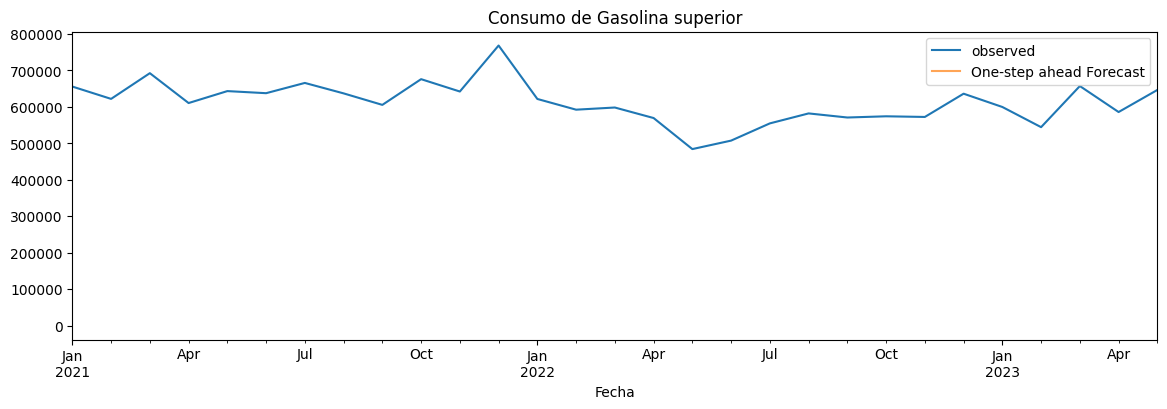

In [157]:
modelo441 = SARIMAX(consumo_log['Gasolina superior'], order=(4,4,1), seasonal_order=(2,1,0,12), enforce_stationarity=False, enforce_invertibility=False)
resultado_m441 = modelo441.fit()

pred = resultado_m441.get_prediction(start=test_consumo['Gasolina superior']['2021':].index[0], dynamic=False)
pred_ci = pred.conf_int()
ax = test_consumo['Gasolina superior']['2021':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between( pred_ci.iloc[:,0],
                pred_ci.iloc[:,1], color='k', alpha=.2)

# plt.xlim(test_consumo[column]['2023':].index[0], pred_ci.index[-1])
plt.title('Consumo de Gasolina superior')
plt.legend()
plt.show()

##### 2021
Como se puede observar el consumo de gasolina superior ha sido constante con una leve disminucion en el 2022, pero en el 2023 se vuelve a incrementar, algo que si concuerda con la grafica de tendencia de consumo por año realizada en el analisis exploratorio.

c:\Users\Juan_Avila\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Juan_Avila\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


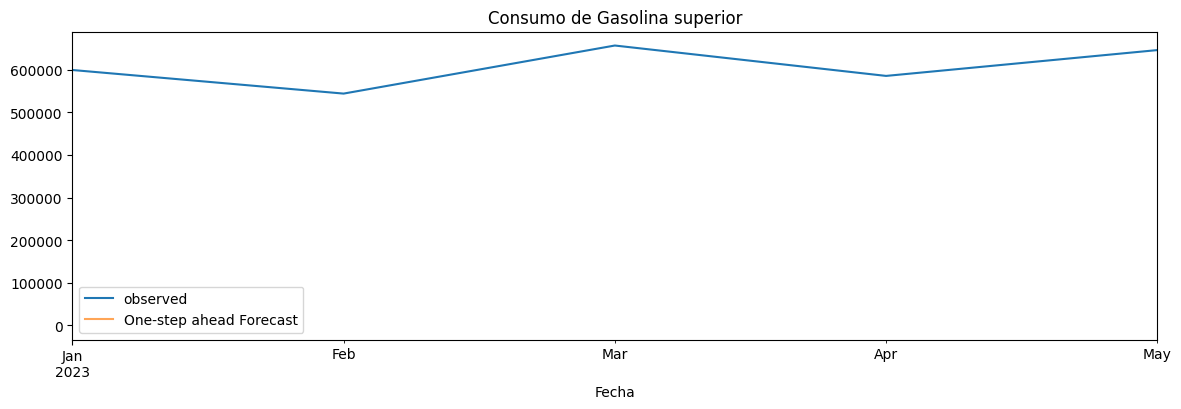

In [159]:
modelo441 = SARIMAX(consumo_log['Gasolina superior'], order=(4,4,1), seasonal_order=(2,1,0,12), enforce_stationarity=False, enforce_invertibility=False)
resultado_m441 = modelo441.fit()

pred = resultado_m441.get_prediction(start=test_consumo['Gasolina superior']['2023':].index[0], dynamic=False)
pred_ci = pred.conf_int()
ax = test_consumo['Gasolina superior']['2023':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
plt.title('Consumo de Gasolina superior')
plt.legend()
plt.show()

##### 2023
Segun la prediccion, el precio de la gasolina superior sera constante en el año 2023, con un leve aumento a final de año. Lo que concuerda con los valores reales analizados en el análisis exploratorio de datos.

### 3.3 Precios Promedio Nacionales de gasolina superior

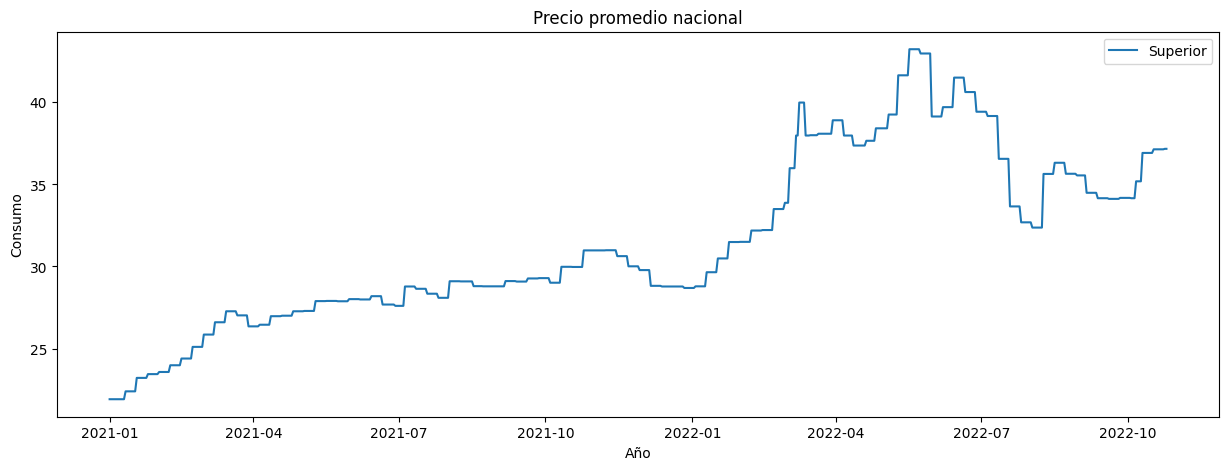

In [160]:
plt.plot(tr_precios.index, tr_precios['Superior'], label='Superior')
plt.gca().set(title='Precio promedio nacional', ylabel='Consumo', xlabel='Año')
plt.legend()
plt.show()

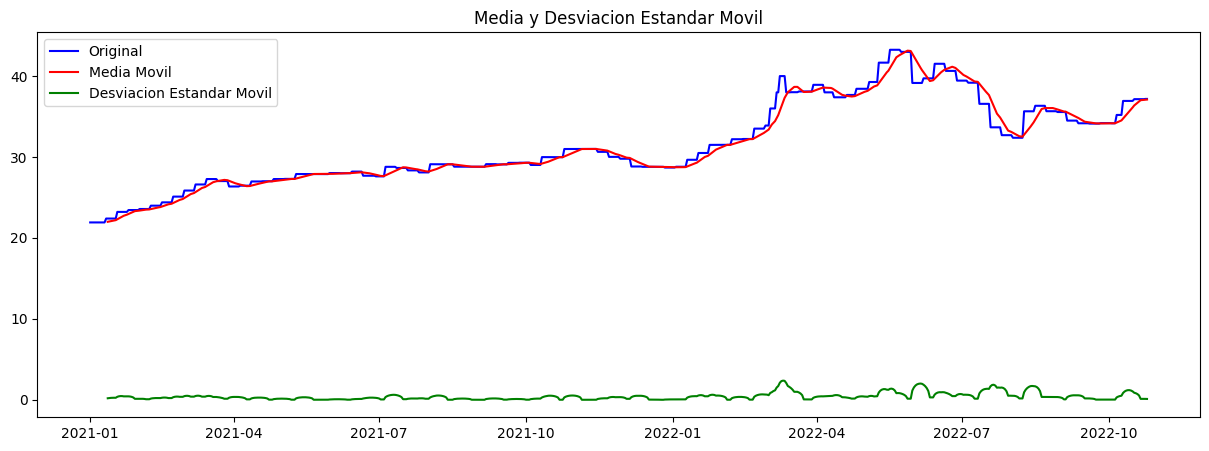

In [161]:
mediaMovil = tr_precios['Superior'].rolling(window=12).mean()
desviacionMovil = tr_precios['Superior'].rolling(window=12).std()

original = plt.plot(tr_precios['Superior'], color='blue', label='Original')
media = plt.plot(mediaMovil, color='red', label='Media Movil')
desviacion = plt.plot(desviacionMovil, color='green', label='Desviacion Estandar Movil')
plt.legend(loc='best')
plt.title('Media y Desviacion Estandar Movil')
plt.show(block=False)

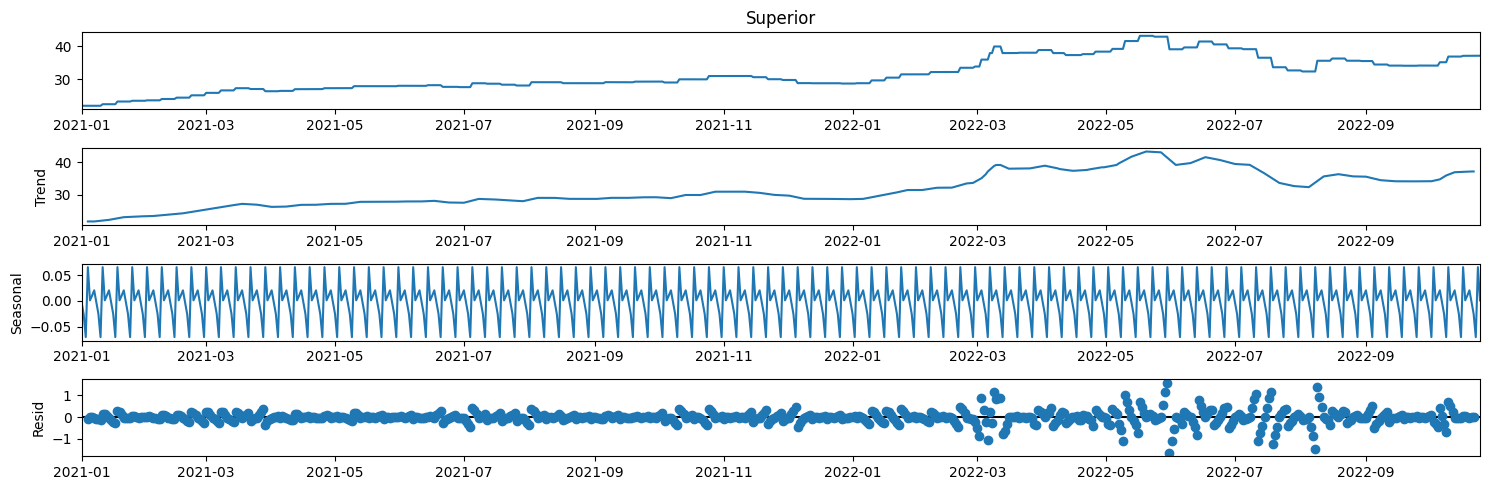

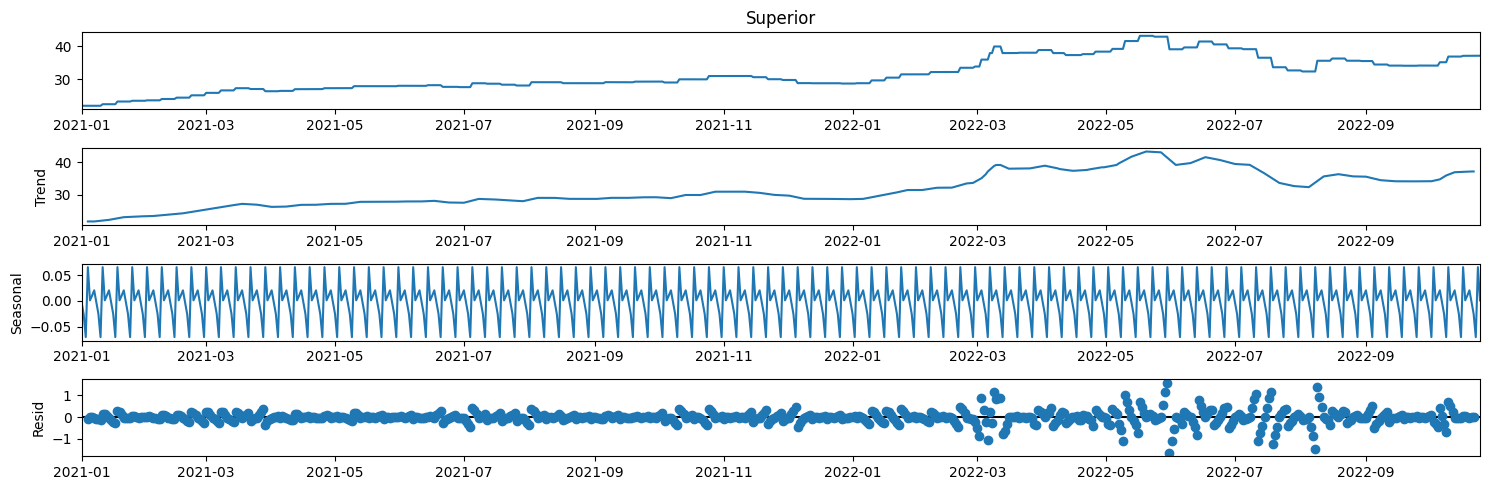

In [162]:
descomposition = seasonal_decompose(tr_precios['Superior'])
descomposition.plot()

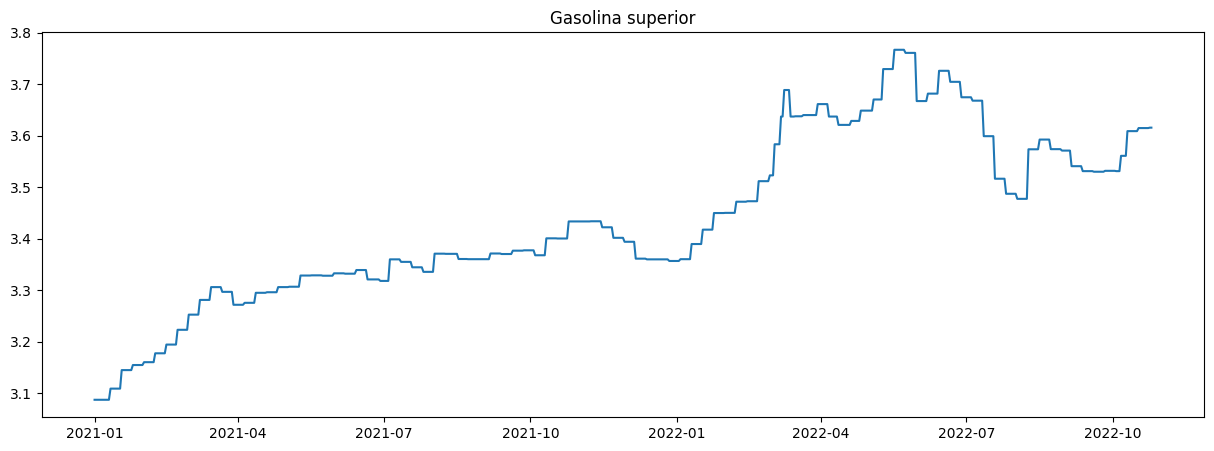

In [163]:
precios_log = tr_precios.copy()

# for column in cuantitativas:
precios_log['Superior'] = np.log(precios_log['Superior'])
plt.plot(precios_log['Superior'])
plt.title('Gasolina superior')
plt.show()

In [164]:
print('Resultados del Test de Dicker-Fuller para la variable Gasolina superior')
dfTest = adfuller(tr_precios['Superior'], autolag='AIC')
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)

Resultados del Test de Dicker-Fuller para la variable Gasolina superior
Estadístico de prueba         -1.777205
p-value                        0.391836
# de retardos usados           7.000000
# de observaciones usadas    655.000000
Critical Value (1%)           -3.440373
Critical Value (5%)           -2.865963
Critical Value (10%)          -2.569125
dtype: float64


In [165]:
precios_diff = tr_precios.diff()
precios_diff.dropna(inplace=True)

# for column in cuantitativas:
print('Resultados del Test de Dickey Fuller para una diferenciación de la serie')
dfTest = adfuller(precios_diff['Superior'])
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)

Resultados del Test de Dickey Fuller para una diferenciación de la serie
Estadístico de prueba       -7.455076e+00
p-value                      5.539811e-11
# de retardos usados         6.000000e+00
# de observaciones usadas    6.550000e+02
Critical Value (1%)         -3.440373e+00
Critical Value (5%)         -2.865963e+00
Critical Value (10%)        -2.569125e+00
dtype: float64


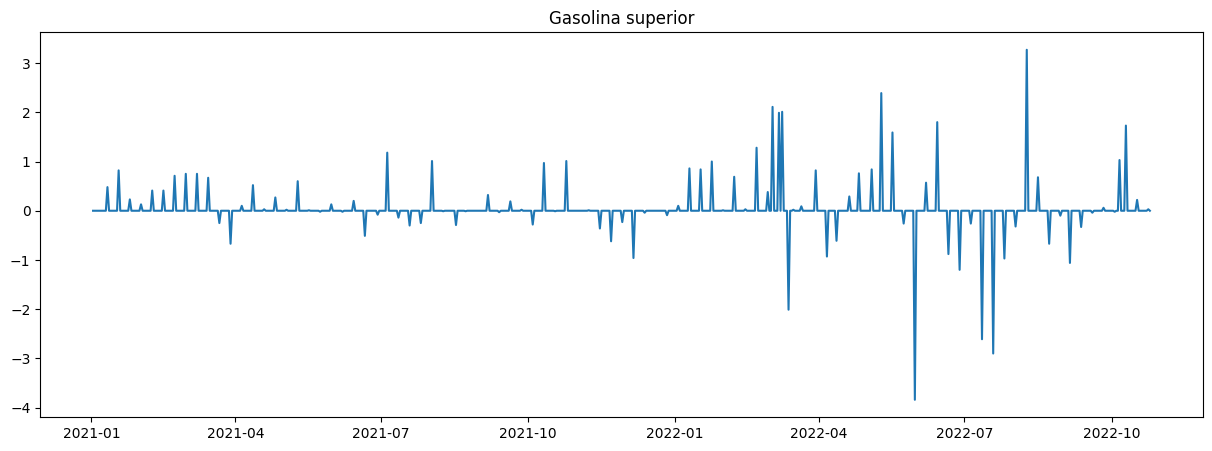

In [166]:
plt.plot(precios_diff['Superior'], label='Gasolina superior')
plt.title('Gasolina superior')
plt.show()

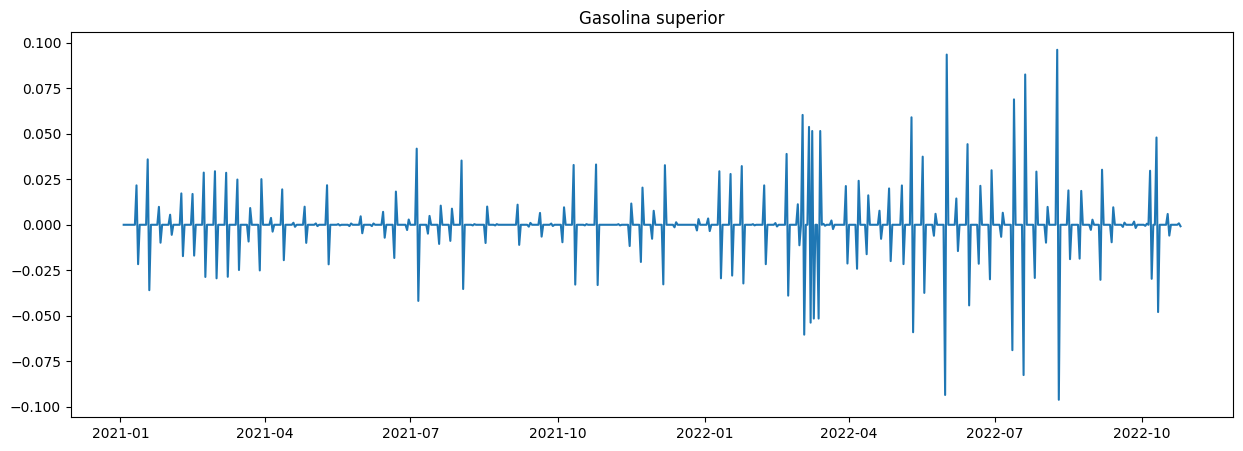

In [167]:
plt.plot(precios_log['Superior'].diff().diff())
plt.title('Gasolina superior')
plt.show()

In [168]:
precios_log_diff = pd.DataFrame(columns = cuantitativas)

precios_log_diff_act = precios_log['Superior'].diff().diff()
precios_log_diff_act.dropna(inplace = True)
precios_log_diff['Superior'] = precios_log_diff_act
tsa_acf = acf(precios_log_diff_act, nlags=5,fft=False)
tsa_pacf = pacf(precios_log_diff_act, nlags=36)

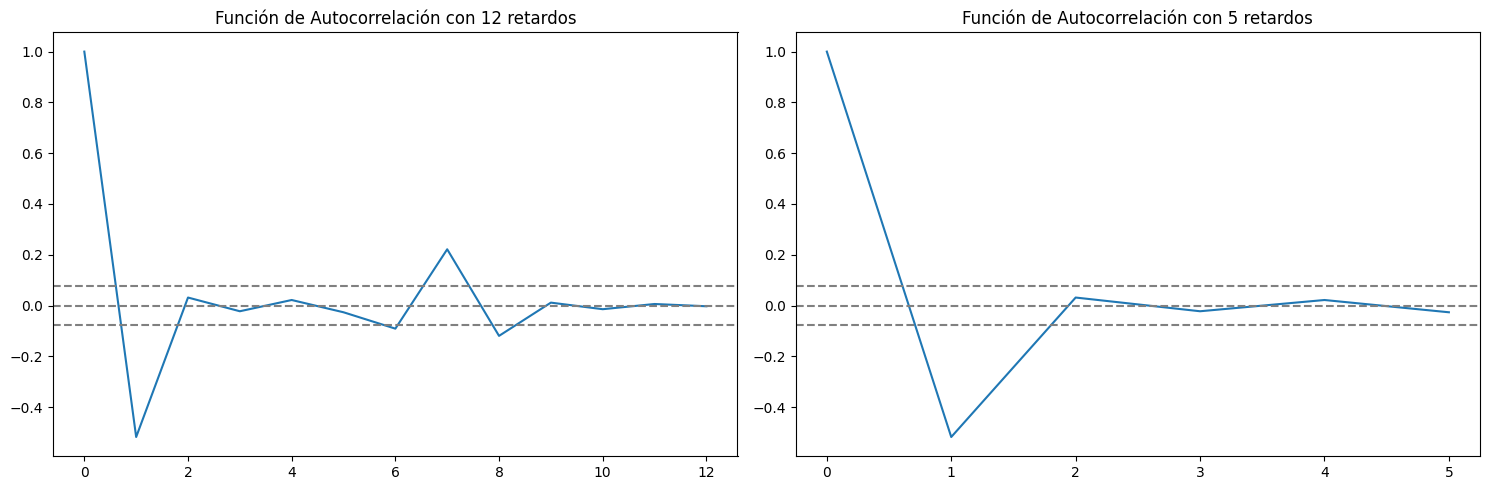

In [169]:
#Plot ACF: 
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

plt.subplot(121) 
plt.plot(acf(precios_log_diff['Superior'],nlags=12,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(precios_log_diff['Superior'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(precios_log_diff['Superior'])),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 12 retardos')

plt.subplot(122) 
plt.plot(acf(precios_log_diff['Superior'],nlags=5,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(precios_log_diff['Superior'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(precios_log_diff['Superior'])),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 5 retardos')

plt.tight_layout()

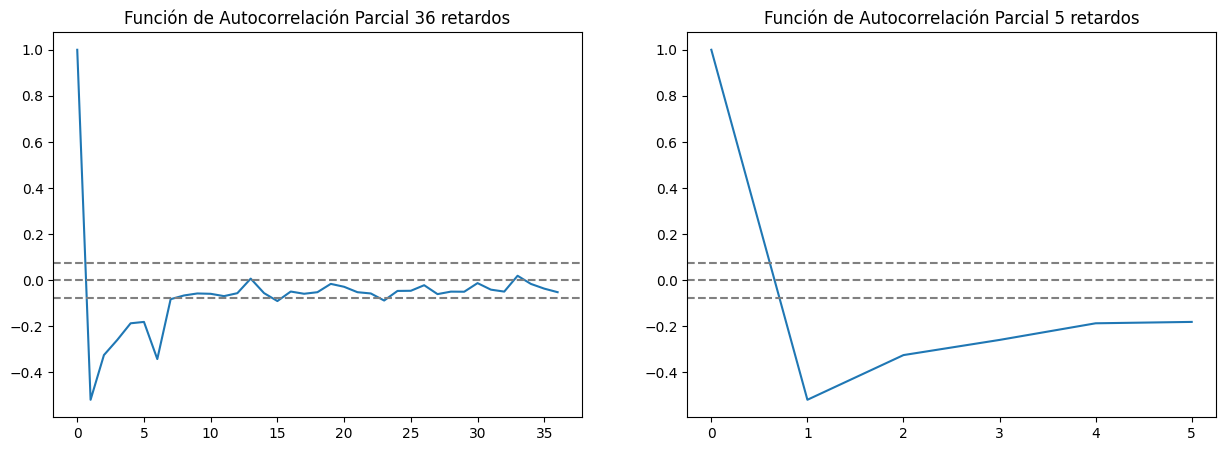

In [170]:
#plot PACF

plt.subplot(121)
plt.plot(pacf(precios_log_diff['Superior'], nlags=36))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(precios_log_diff['Superior'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(precios_log_diff['Superior'])),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 36 retardos')

plt.subplot(122)
plt.plot(pacf(precios_log_diff['Superior'], nlags=5))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(precios_log_diff['Superior'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(precios_log_diff['Superior'])),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 5 retardos')

plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100

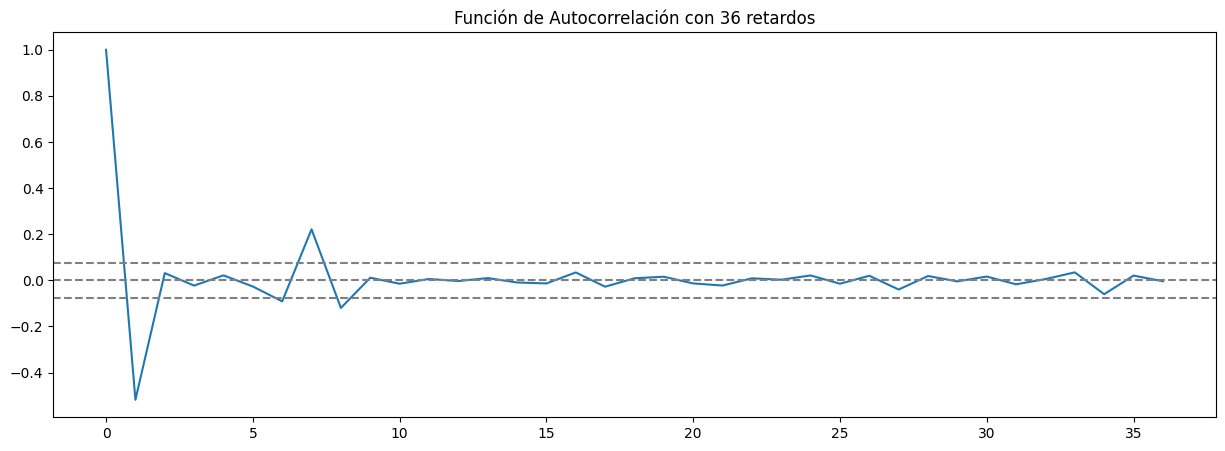

In [171]:
plt.plot(acf(precios_log_diff['Superior'],nlags=36,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(precios_log_diff['Superior'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(precios_log_diff['Superior'])),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 36 retardos')
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [172]:
precios_log_D = precios_log.diff(12)
precios_log_D.dropna(inplace=True)

Text(0.5, 1.0, 'Función de Autocorrelación Parcial 5 retardos')

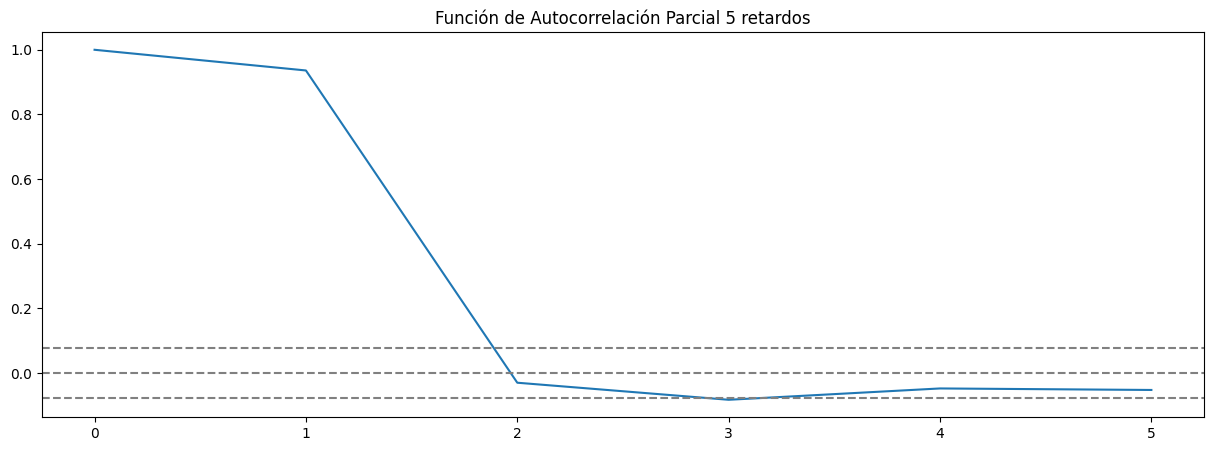

In [173]:
plt.plot(pacf(precios_log_D['Superior'], nlags=5))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(precios_log_D['Superior'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(precios_log_D['Superior'])),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 5 retardos')

Luego de hacer la diferenciacion se puede ver que se anulan los coeficientes despues de p = 2. Se probara con p = 2, d = 1, q = 0

c:\Users\Juan_Avila\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Juan_Avila\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0004      0.078      0.005      0.996      -0.153       0.154
ma.L1         -1.0000      3.513     -0.285      0.776      -7.884       5.884
ar.S.L12      -0.6796      0.023    -29.425      0.000      -0.725      -0.634
ar.S.L24      -0.3137      0.023    -13.522      0.000      -0.359      -0.268
sigma2         0.0002      0.001      0.284      0.776      -0.001       0.001


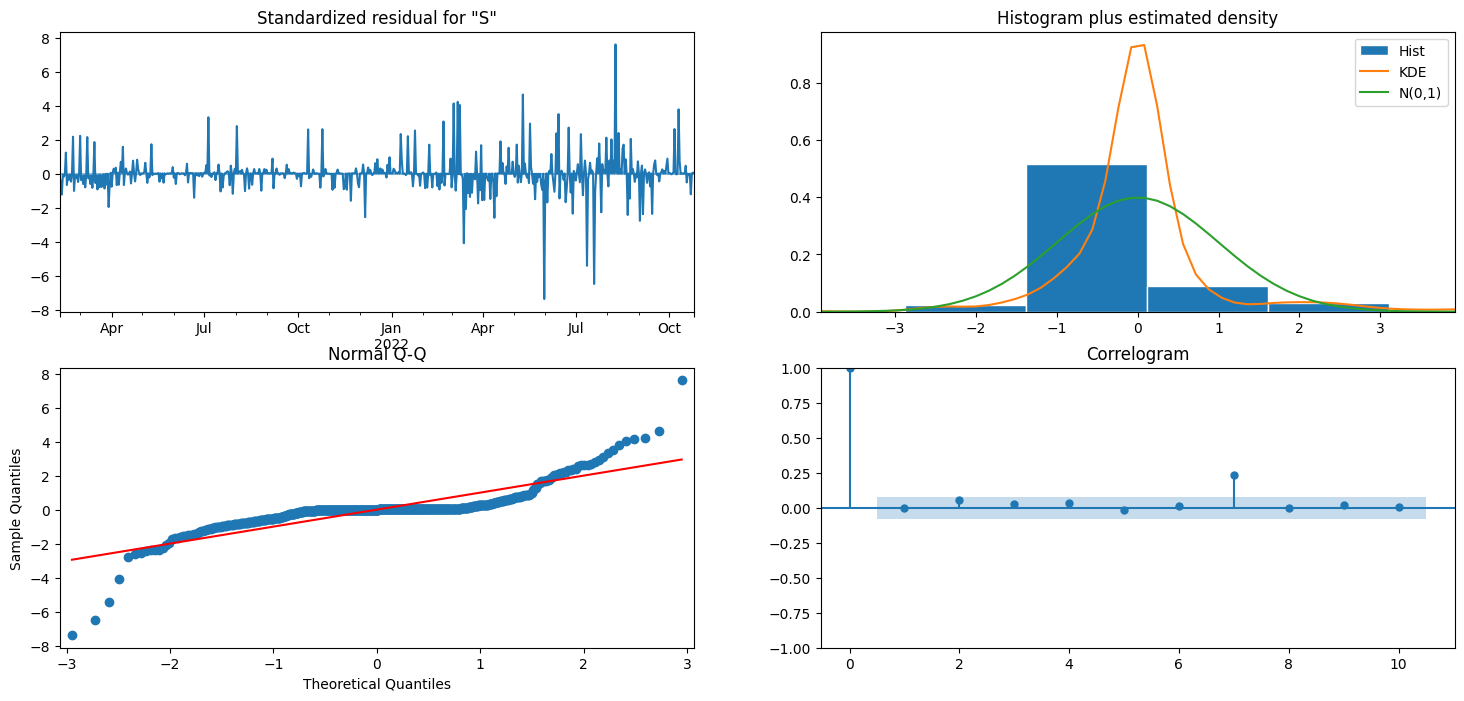

In [174]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

modelo121 = SARIMAX(precios_log['Superior'], order=(1,2,1), seasonal_order=(2,1,0,12), enforce_stationarity=False, enforce_invertibility=False)
resultado_m121 = modelo121.fit()
print(resultado_m121.summary().tables[1])

resultado_m121.plot_diagnostics(figsize=(18, 8))
plt.show()


c:\Users\Juan_Avila\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Juan_Avila\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


c:\Users\Juan_Avila\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3649      0.028    -49.129      0.000      -1.419      -1.310
ar.L2         -1.2155      0.050    -24.455      0.000      -1.313      -1.118
ar.L3         -0.7956      0.050    -15.919      0.000      -0.894      -0.698
ar.L4         -0.2998      0.033     -9.022      0.000      -0.365      -0.235
ma.L1         -0.9997      0.318     -3.144      0.002      -1.623      -0.377
ar.S.L12      -0.6664      0.030    -22.177      0.000      -0.725      -0.607
ar.S.L24      -0.3095      0.028    -10.955      0.000      -0.365      -0.254
sigma2         0.0003   8.85e-05      3.295      0.001       0.000       0.000


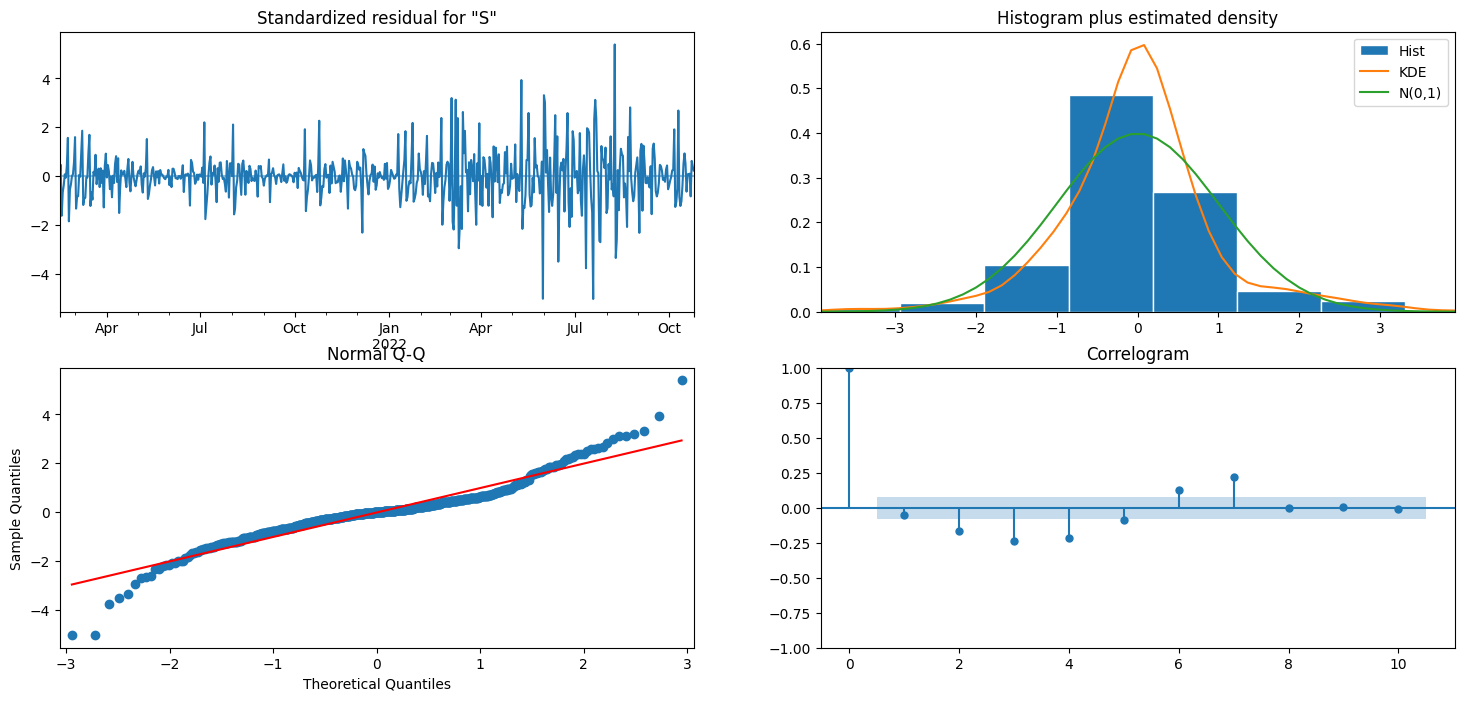

Resultados de AIC (Akaike information criterion)
Modelo 121= -3663.6178397404083
Resultados de BIC (Bayesian information criterion)
Modelo 121= -3641.437087898561
Resultados de AIC (Akaike information criterion)
Modelo 221= -3260.11856580965
Resultados de BIC (Bayesian information criterion)
Modelo 221= -3224.6937236281733


In [175]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

modelo221 = SARIMAX(precios_log['Superior'], order=(4,4,1), seasonal_order=(2,1,0,12), enforce_stationarity=False, enforce_invertibility=False)
resultado_m221 = modelo221.fit()
print(resultado_m221.summary().tables[1])

resultado_m221.plot_diagnostics(figsize=(18, 8))
plt.show()

print("Resultados de AIC (Akaike information criterion)")
print("Modelo 121=",resultado_m121.aic)
print("Resultados de BIC (Bayesian information criterion)")
print("Modelo 121=",resultado_m121.bic)
print("Resultados de AIC (Akaike information criterion)")
print("Modelo 221=",resultado_m221.aic)
print("Resultados de BIC (Bayesian information criterion)")
print("Modelo 221=",resultado_m221.bic)

##### Mejor modelo

El mejor modelo es el 121 ya que tiene un mejor ajuste a los datos según el criterio de información de AIC y BIC.

#### Prediccion con el modelo 121

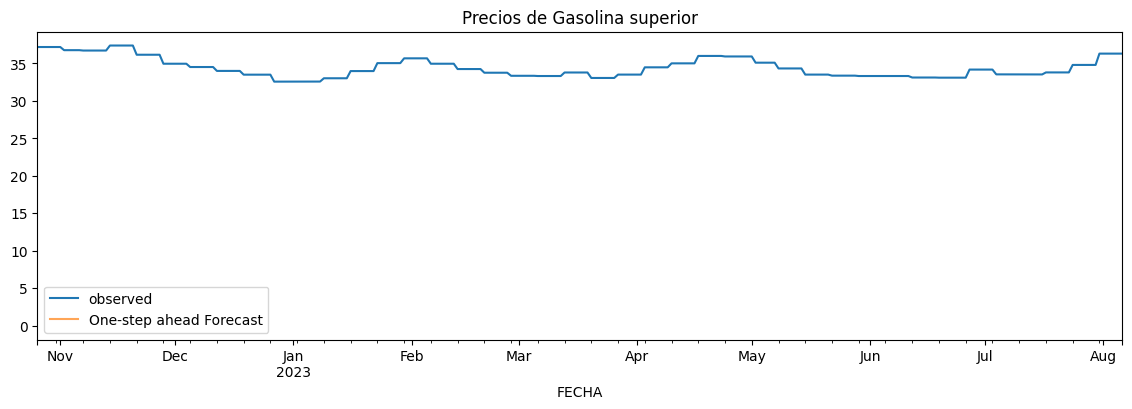

In [176]:
pred = resultado_m121.get_prediction(start=test_precios['Superior']['2021':].index[0], dynamic=False)
pred_ci = pred.conf_int()
ax = test_precios['Superior']['2021':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between( pred_ci.iloc[:,0],
                pred_ci.iloc[:,1], color='k', alpha=.2)

# plt.xlim(test_consumo[column]['2023':].index[0], pred_ci.index[-1])
plt.title('Precios de Gasolina superior')
plt.legend()
plt.show()

##### 2021 - 2023

Como se puede observar en la grafica anterior, los precios durante los ultimos tres años se han mantenido en el mismo rango de valores. Practicamente el inicio y el final de la grafica son iguales a pesar de que en el 2022 se observo una pequeña disminución.  

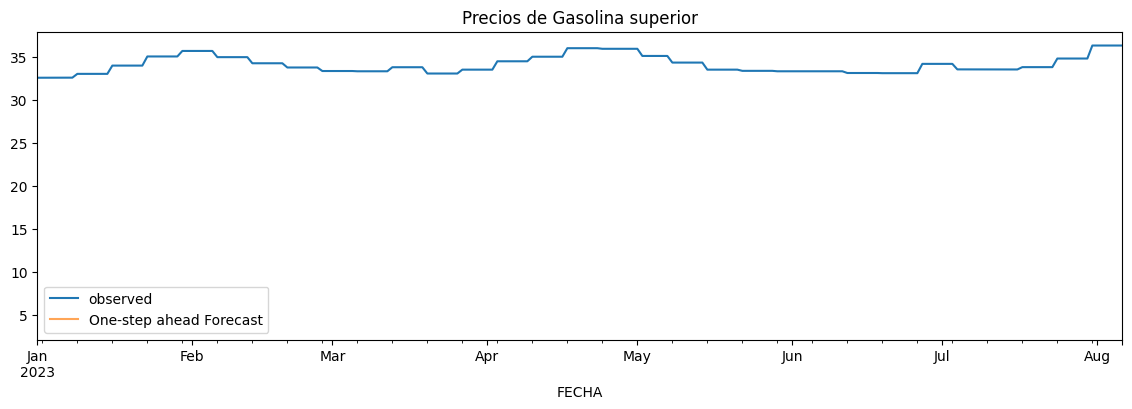

In [177]:
pred = resultado_m121.get_prediction(start=test_precios['Superior']['2023':].index[0], dynamic=False)
pred_ci = pred.conf_int()
ax = test_precios['Superior']['2023':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
plt.title('Precios de Gasolina superior')
plt.legend()
plt.show()

##### 2023
Segun la prediccion, el precio de la gasolina superior sera constante en el año 2023, con un leve aumento a final de año. Lo que no concuerda con los valores reales analizados en el análisis exploratorio de datos, porque en lugar de disminuir lo que se veia en el analisis exploratorio sino que aumenta. 

### 6. Comportamiento durante la pandemia

Se pudo observar que el consumo de la gasolina, independientemente el tipo se redujo desde el 2021, y regresó a aumentar en el 2023, ya que se detuvo el encierrro por la pandemia, y la gente volvió a salir a las calles, y por ende, a consumir gasolina. El precio también aumentó en el 2022 y eso es tanto por la pandemia como la guerra de Ucrania vs Russia en la que las petroleras tuvieron conflictos con la importación y venta de gasolina.